In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [97]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 100)

In [98]:
# df = pd.read_csv('data/data_clean.csv')
# df.head(1)

In [99]:
# kw1000 = pd.read_csv('data/kw_1_000.old.csv', header=0)
# print(f"Records: {len(kw1000)}")
# kw1000 = kw1000.rename(columns={'Keyword': 'kw'})
# kw1000 = kw1000.drop(['Volume', 'URL'], axis=1 )
# kw1000.head(1)

In [100]:
# df = pd.merge(left=df, right=kw1000, left_on='kw', right_on='kw', how='left')
# df.head()

In [101]:
def multiplotv_dark(df: pd.DataFrame, filter_col: str = None, fmin: float = None, fmax: float = None) -> None:
    """
    Generate a set of 4 plots to visualize the relationship between two variables in a DataFrame.
    :param df: DataFrame containing the data
    :param filter_col: Name of the column to filter on (optional)
    :param filter_min: Minimum value for the filter_col (optional)
    :param filter_max: Maximum value for the filter_col (optional)
    """

    # define subplots
    face_color = '0.1'
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), facecolor=face_color)
    
    # Set background color to black
    #plt.style.use('dark_background')

    # apply filter and subtitle
    if filter_col:
        if fmin is not None and fmax is not None:
            if fmin < fmax:
                fig.text(0.5, 0.94, f'Filtered on {fmin} < {filter_col} < {fmax}', ha='center', fontsize=16, color='white')
                df = df[(df[filter_col] <= fmax) & (df[filter_col] >= fmin)]
            else:
                fmin, fmax = fmax, fmin
                fig.text(0.5, 0.94, f'Filtered on {fmin} > {filter_col} > {fmax}', ha='center', fontsize=16, color='white')
                df = df[(df[filter_col] >= fmax) | (df[filter_col] <= fmin)]
        elif fmin is not None and fmax is None:
            fig.text(0.5, 0.94, f'Filtered on {filter_col} > {fmin}', ha='center', fontsize=16, color='white')
            df = df[df[filter_col] >= fmin]
        elif fmin is None and fmax is not None:
            fig.text(0.5, 0.94, f'Filtered on {filter_col} < {fmax}', ha='center', fontsize=16, color='white')
            df = df[df[filter_col] <= fmax]
        else:
            print(f'Warning: you must provide a min and/or max on which to filter on {filter_col} or no filtering will occur')

    # apply main title
    main_title = f'Correlation Study: Rank vs Percent Human ({len(df)} data points)'
    fig.suptitle(main_title, fontsize=20, fontweight='bold', y=.98, color='white')
    
    
    # Fig 1: Q-Q plot [0, 0]
    st.probplot(df['percent_human'], dist='norm', plot=axs[0, 0])
    axs[0, 0].set_title('Figure 1: Q-Q Plot of Percent Human')
    axs[0, 0].set_xlabel('Theoretical quantiles')
    axs[0, 0].set_ylabel('Sample quantiles')
    axs[0, 0].text(0.02, 0.95, 'Data is not normally distributed\nand cannot be evaluated using Pearson\'s method', transform=axs[0, 0].transAxes, fontsize=12, verticalalignment='top', color='white')

    
    # Fig 2: Histogram [0, 1]
    sns.histplot(data=df['percent_human'], kde=False, binwidth=1, color='green', ax=axs[0, 1], edgecolor='grey')
    axs[0, 1].set_title('Figure 2: Histogram of Percent Human')
    axs[0, 1].set_xlabel('Percent Human')
    axs[0, 1].set_ylabel('Count')
    axs[0, 1].set_xlim(-5, 105)
    axs[0, 1].set_ylim(0, None)
    skewness = round(st.skew(df['percent_human']), 2)
    axs[0, 1].text(0.02, 0.95, f'Data Skewness {skewness}', transform=axs[0, 1].transAxes, fontsize=12, verticalalignment='top', color='white')
    #axs[0, 1].text(0.02, 0.90, f'Over 1/3 of data in top 2%', transform=axs[0, 1].transAxes, fontsize=12, verticalalignment='top', color='black')

    
    # Fig 3: Violin plot [1, 0]
    sns.violinplot(ax=axs[1, 0], data=df, x="rank", y="percent_human", scale="count", inner="box", color="#00aa00", saturation=0.5, cut=0, linewidth=.9)

        # plot mean lines
    for i, mean in enumerate(df.groupby("rank")["percent_human"].mean()):
        axs[1, 0].hlines(mean, i-0.25, i+0.25, linewidth=1, color='#bbbbbb', zorder=100)

        # plot median markers
    median_markers = df.groupby('rank')['percent_human'].median()
    sns.scatterplot(ax=axs[1, 0], x=median_markers.index-1, y=median_markers.values, marker='o', s=20, color='white', edgecolor='black', zorder=100)
    
    axs[1, 0].set_title('Figure 3: Percent Human vs Rank')
    axs[1, 0].set_xlabel('Rank')
    axs[1, 0].set_ylabel('Percent Human')

   
    # Fig 4: Scatter plot [1, 1]
    grouped_data = df.groupby('rank')
    mean_percent_human = grouped_data['percent_human'].mean().reset_index()
    sns.scatterplot(ax=axs[1, 1], data=mean_percent_human, x='rank', y='percent_human',  color='green', edgecolor=None)
    sns.regplot(ax=axs[1, 1], data=mean_percent_human, x='rank', y='percent_human', color='green', scatter=False, line_kws={'linestyle':'--'})
    axs[1, 1].set_title('Figure 4: Mean Percent Human vs Rank')
    axs[1, 1].set_xlabel('Rank')
    axs[1, 1].set_ylabel('Mean Percent Human')
    axs[1, 1].set_xticks(np.arange(1, 21))
    axs[1, 1].legend(handles=axs[1, 1].lines[::len(mean_percent_human)], labels=['Best fit line'], facecolor=face_color, labelcolor='white')
    axs[1, 1].text(0.02, 0.05, f'Percent Human is weakly correlated to Rank with a high degree of certainty', transform=axs[1, 1].transAxes, fontsize=10, verticalalignment='top', color='white')

        # Calculate correlation coefficients and p-values
    pb_corr, pb_pval = st.pointbiserialr(df['rank'], df['percent_human'])
    spearman_corr, spearman_pval = st.spearmanr(df['rank'], df['percent_human'])
    kendall_tau, kendall_pval = st.kendalltau(df['rank'], df['percent_human'])

        # Create a dictionary to store the results
    corr = {
        'Method': ['Point Biserial', 'Spearman', 'Kendall'],
        'Corr Coef': [pb_corr, spearman_corr, kendall_tau],
        'P-value': [pb_pval, spearman_pval, kendall_pval]
    }

        # Create a pandas dataframe from the corr dict
    df_corr = pd.DataFrame(corr)

        # Create a table to display the correlation coefficients and p-values
    table_data = [list(df_corr.columns)] + df_corr.values.tolist()
    table = axs[1, 1].table(cellText=table_data,
                    colLabels=None,
                    cellLoc='center',
                    bbox=[0.02, 0.08, 0.5, 0.15],  # x, y, width, height
                    cellColours=[[face_color]*3] + [[face_color]*3]*len(df_corr))
    table.set_fontsize(10)
    for cell in table.get_celld().values():
        cell.set_linewidth(0)
        cell.set_edgecolor('none')
        cell.set_text_props(color='white')


        # Format the table to use 4 significant figures
    for i in range(1, len(table_data)):
        for j in range(1, 3):
            cell = table.get_celld()[i, j]
            cell_text = cell.get_text().get_text()
            cell_text = float(cell_text)
            cell_text = f'{cell_text:.4g}'
            cell.get_text().set_text(cell_text)
            #cell.set_edgecolor('white')
    
    font_color = '#cccccc'
    for ax in axs.flat:
        ax.tick_params(axis='x', labelsize=12, colors=font_color)
        ax.tick_params(axis='y', labelsize=12, colors=font_color)
        ax.set_xlabel(ax.get_xlabel(), fontdict={'fontsize': 14, 'color': font_color})
        ax.set_ylabel(ax.get_ylabel(), fontdict={'fontsize': 14, 'color': font_color})
        ax.set_title(ax.get_title(), fontdict={'fontsize': 16, 'color': 'white'})
        ax.set_facecolor(face_color)
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
            #spine.set_linewidth(2)
    
    # shrink outer margin
    fig.subplots_adjust(left=0.05, right=0.95, top=.90, bottom=0.05)
   
    fig.savefig('figures/Fig_1-4.png')
    plt.show()

In [102]:
df = pd.read_csv('data/data_clean_final.csv')

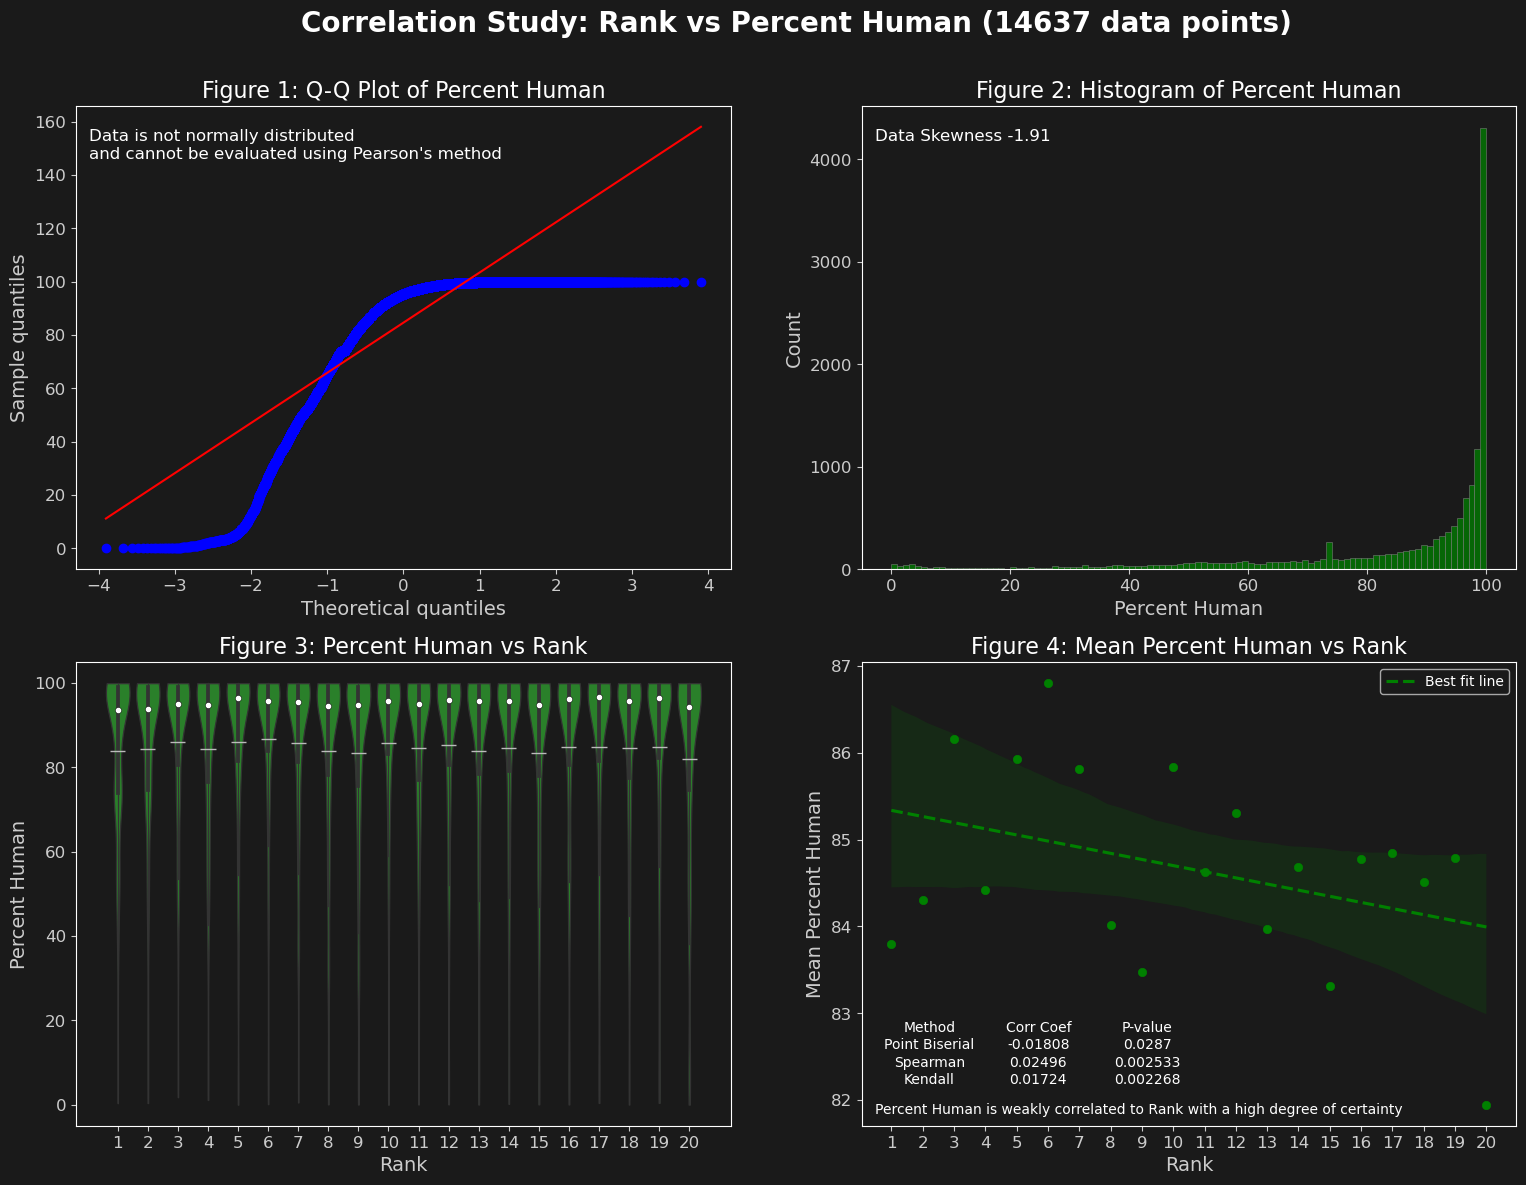

In [103]:
multiplotv_dark(df)

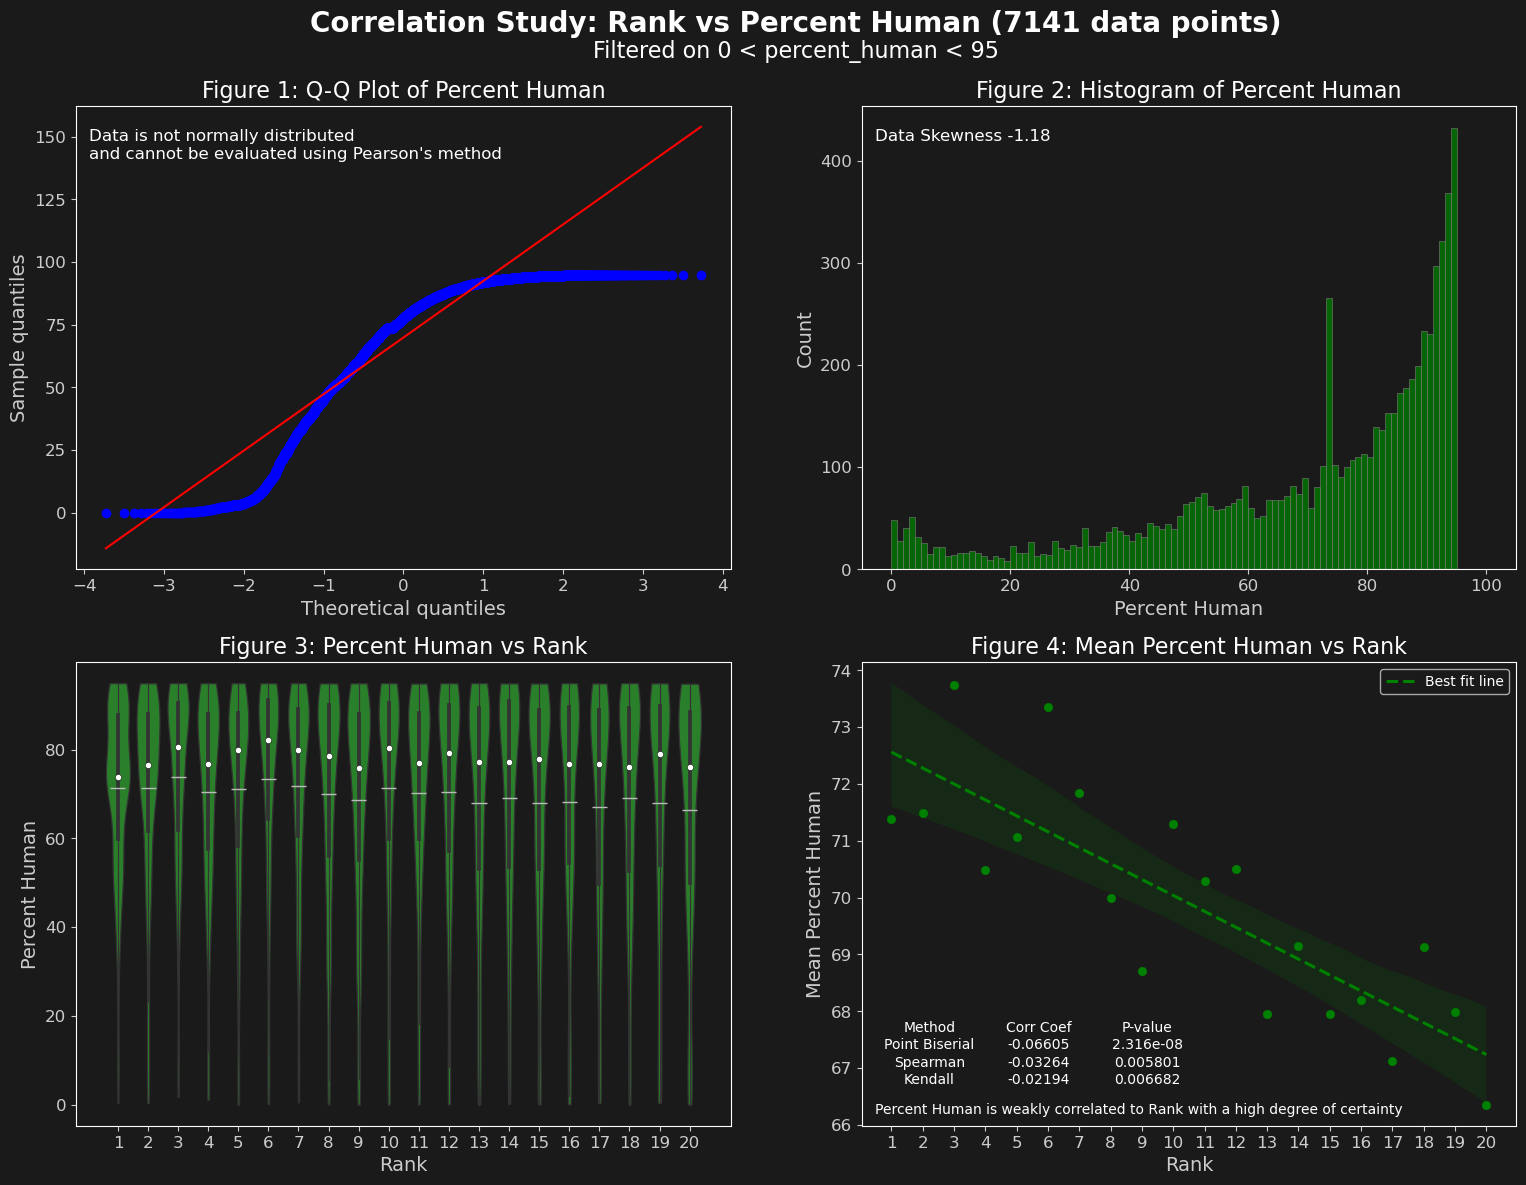

In [104]:
multiplotv_dark(df, 'percent_human', 0, 95)

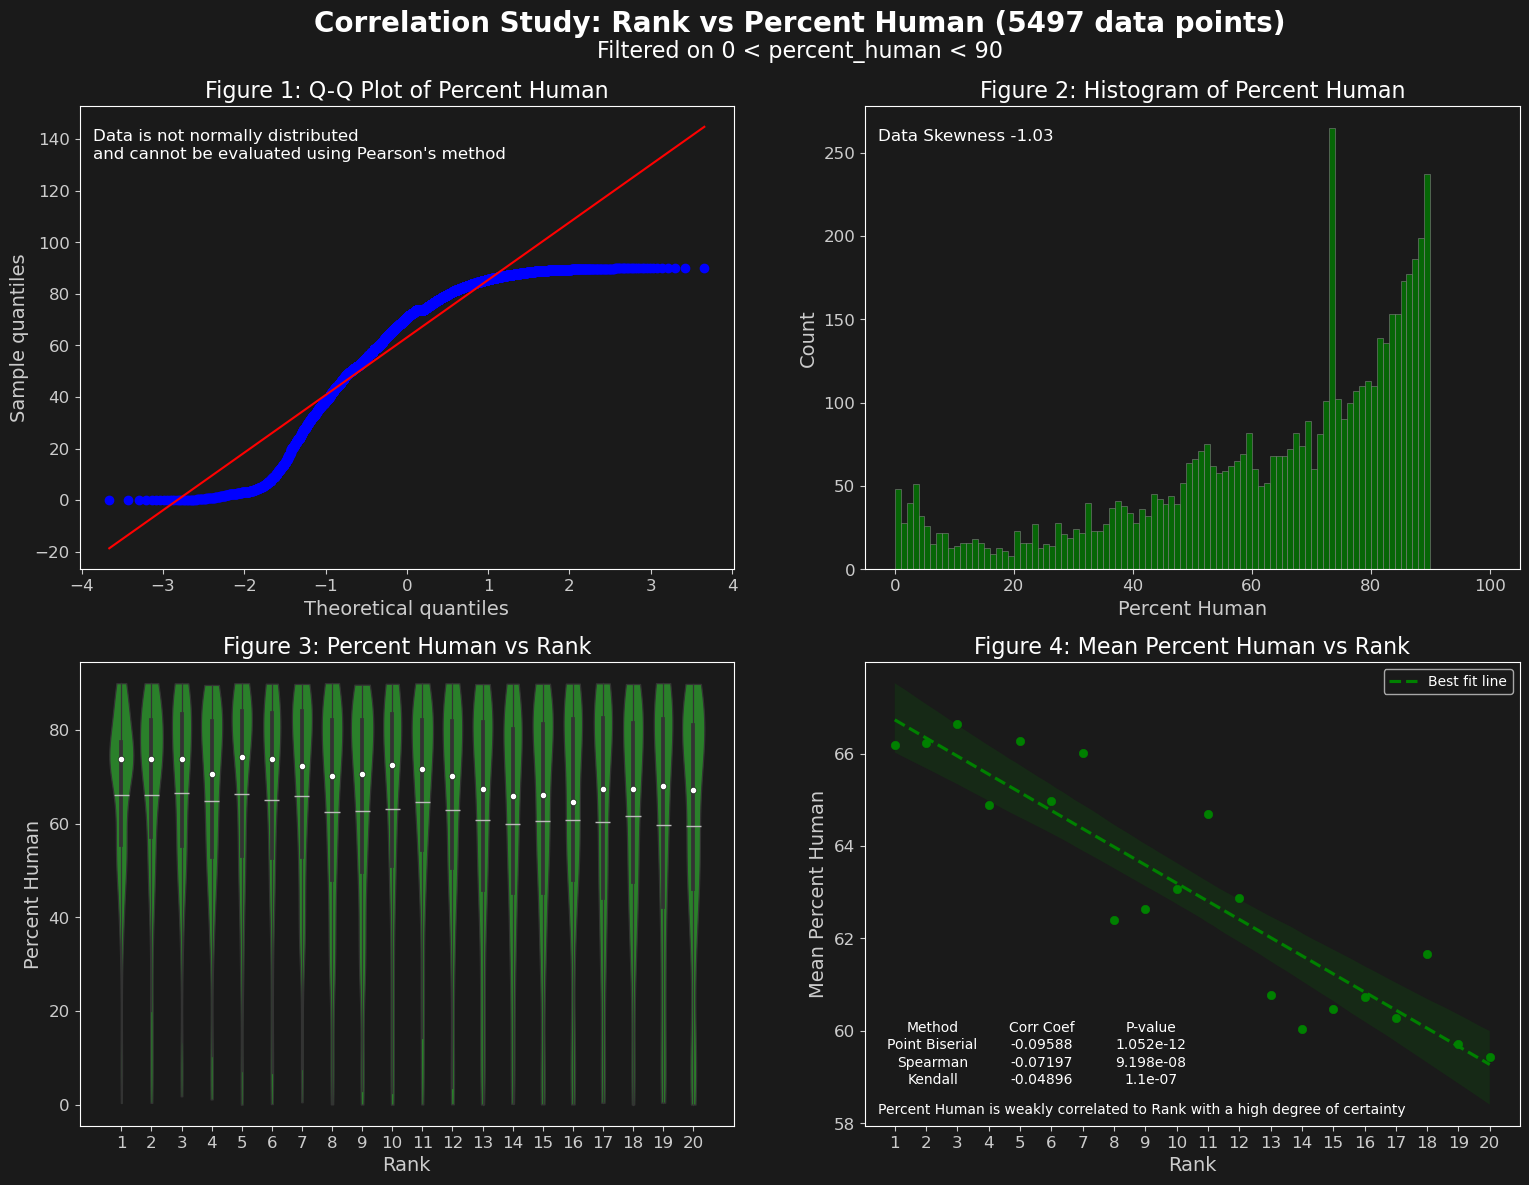

In [105]:
multiplotv_dark(df, 'percent_human', 0, 90)

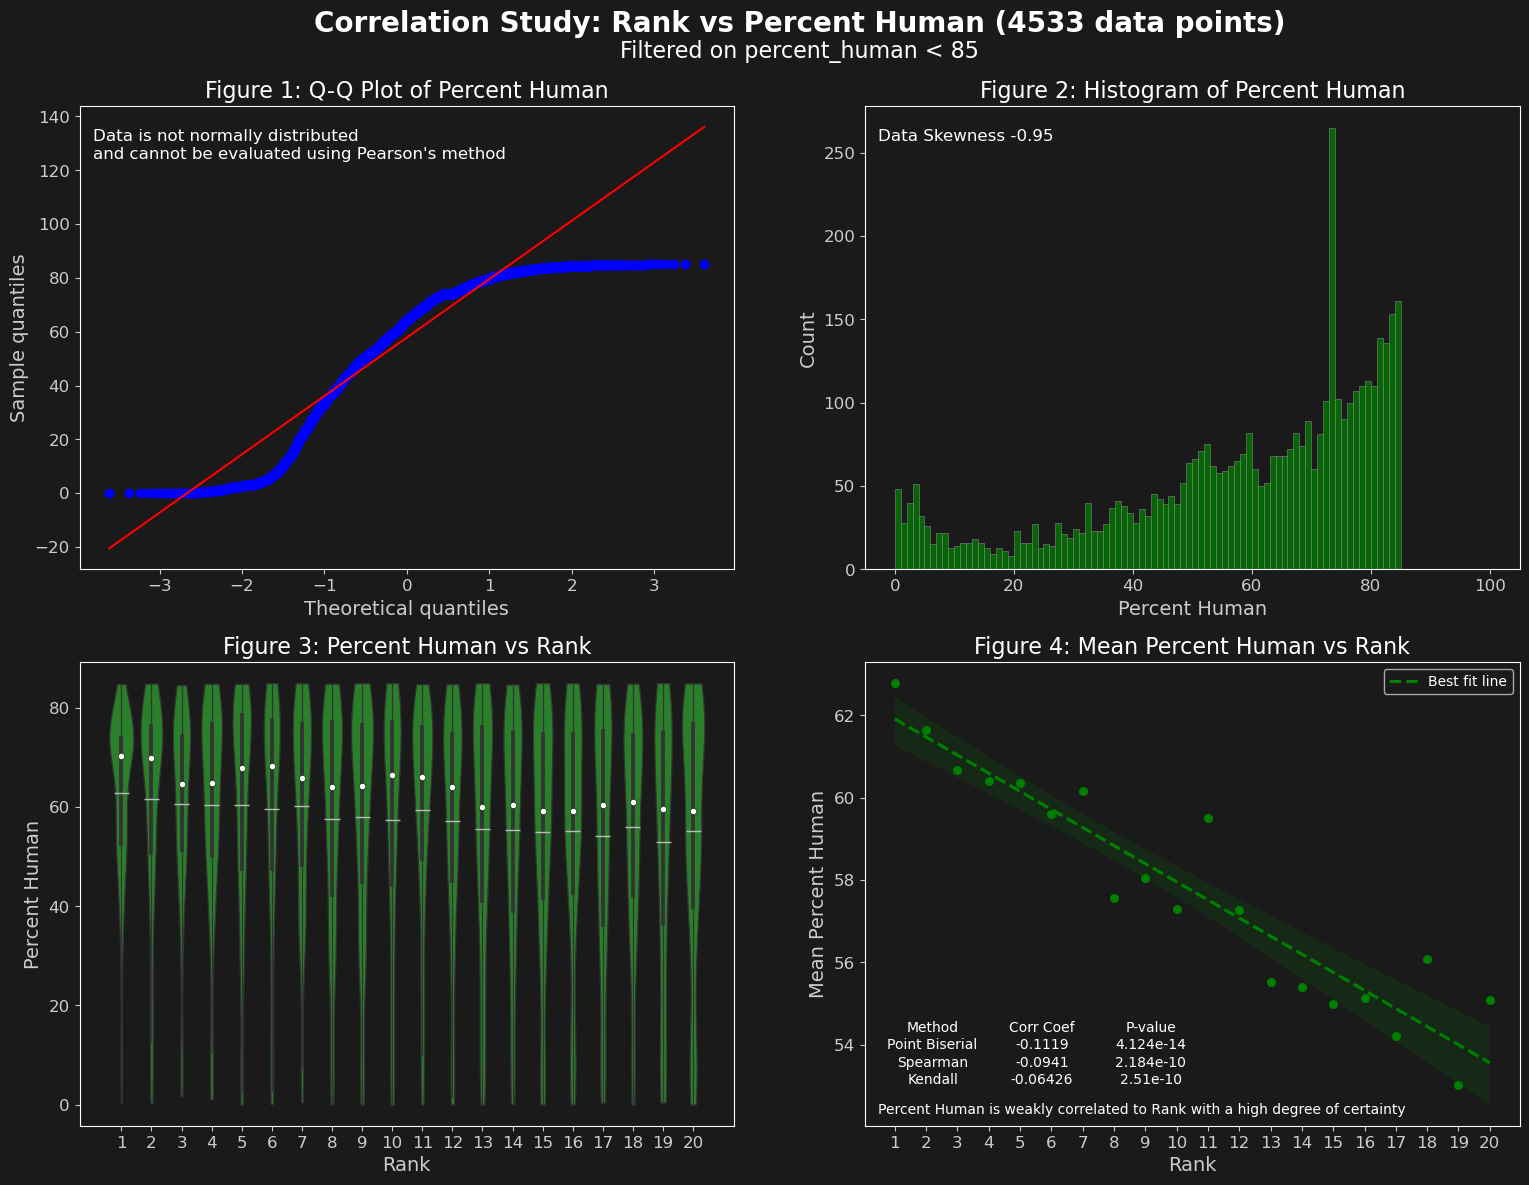

In [106]:
multiplotv_dark(df, 'percent_human', fmax=85)

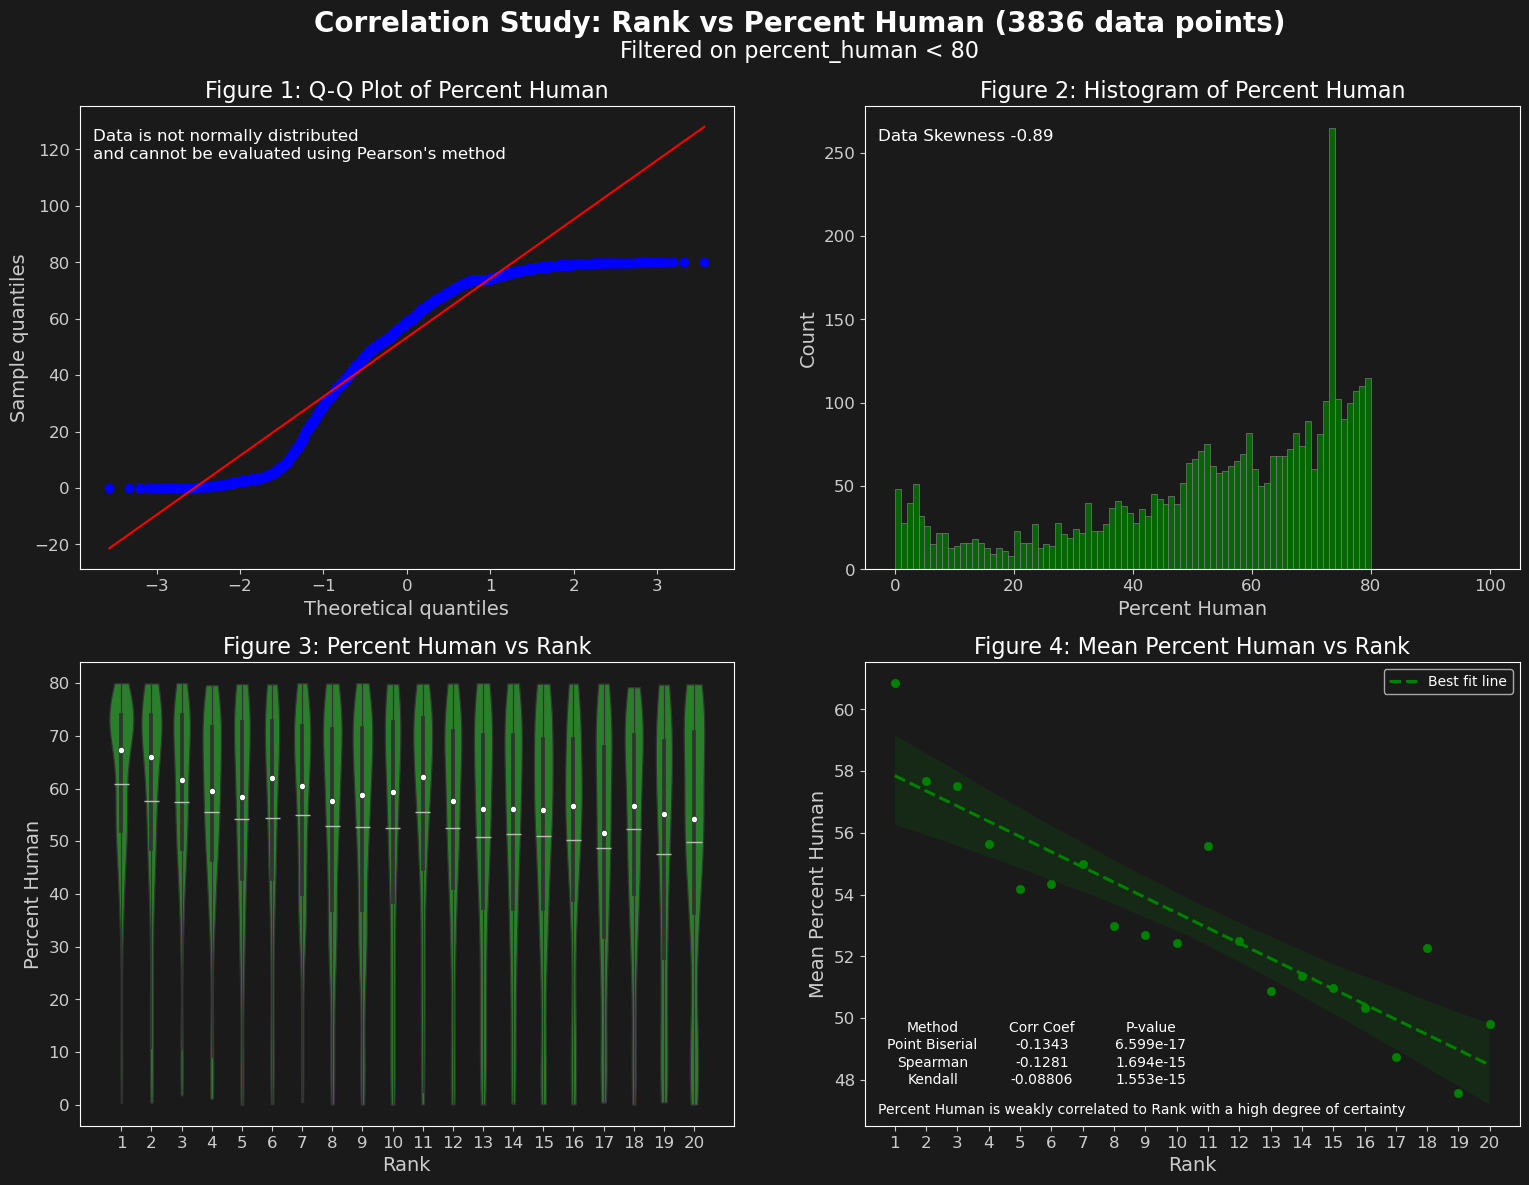

In [107]:
multiplotv_dark(df, 'percent_human', fmax=80)

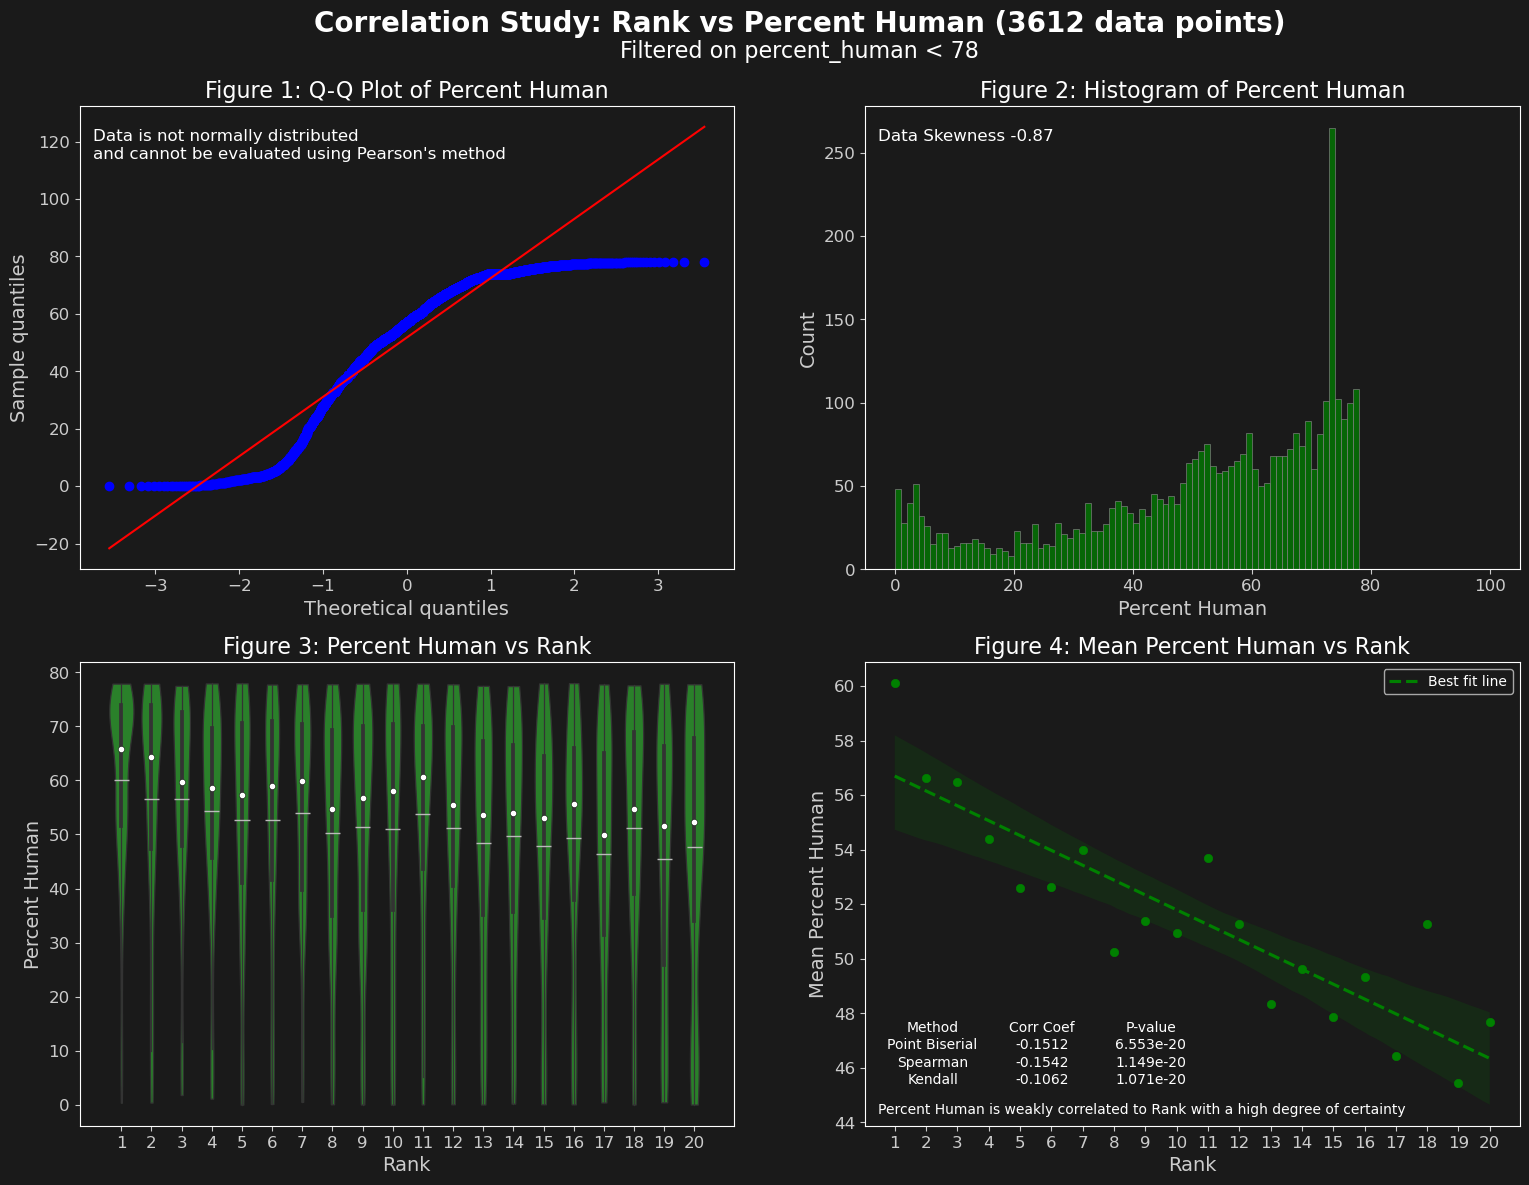

In [108]:
multiplotv_dark(df, 'percent_human', fmax=78)

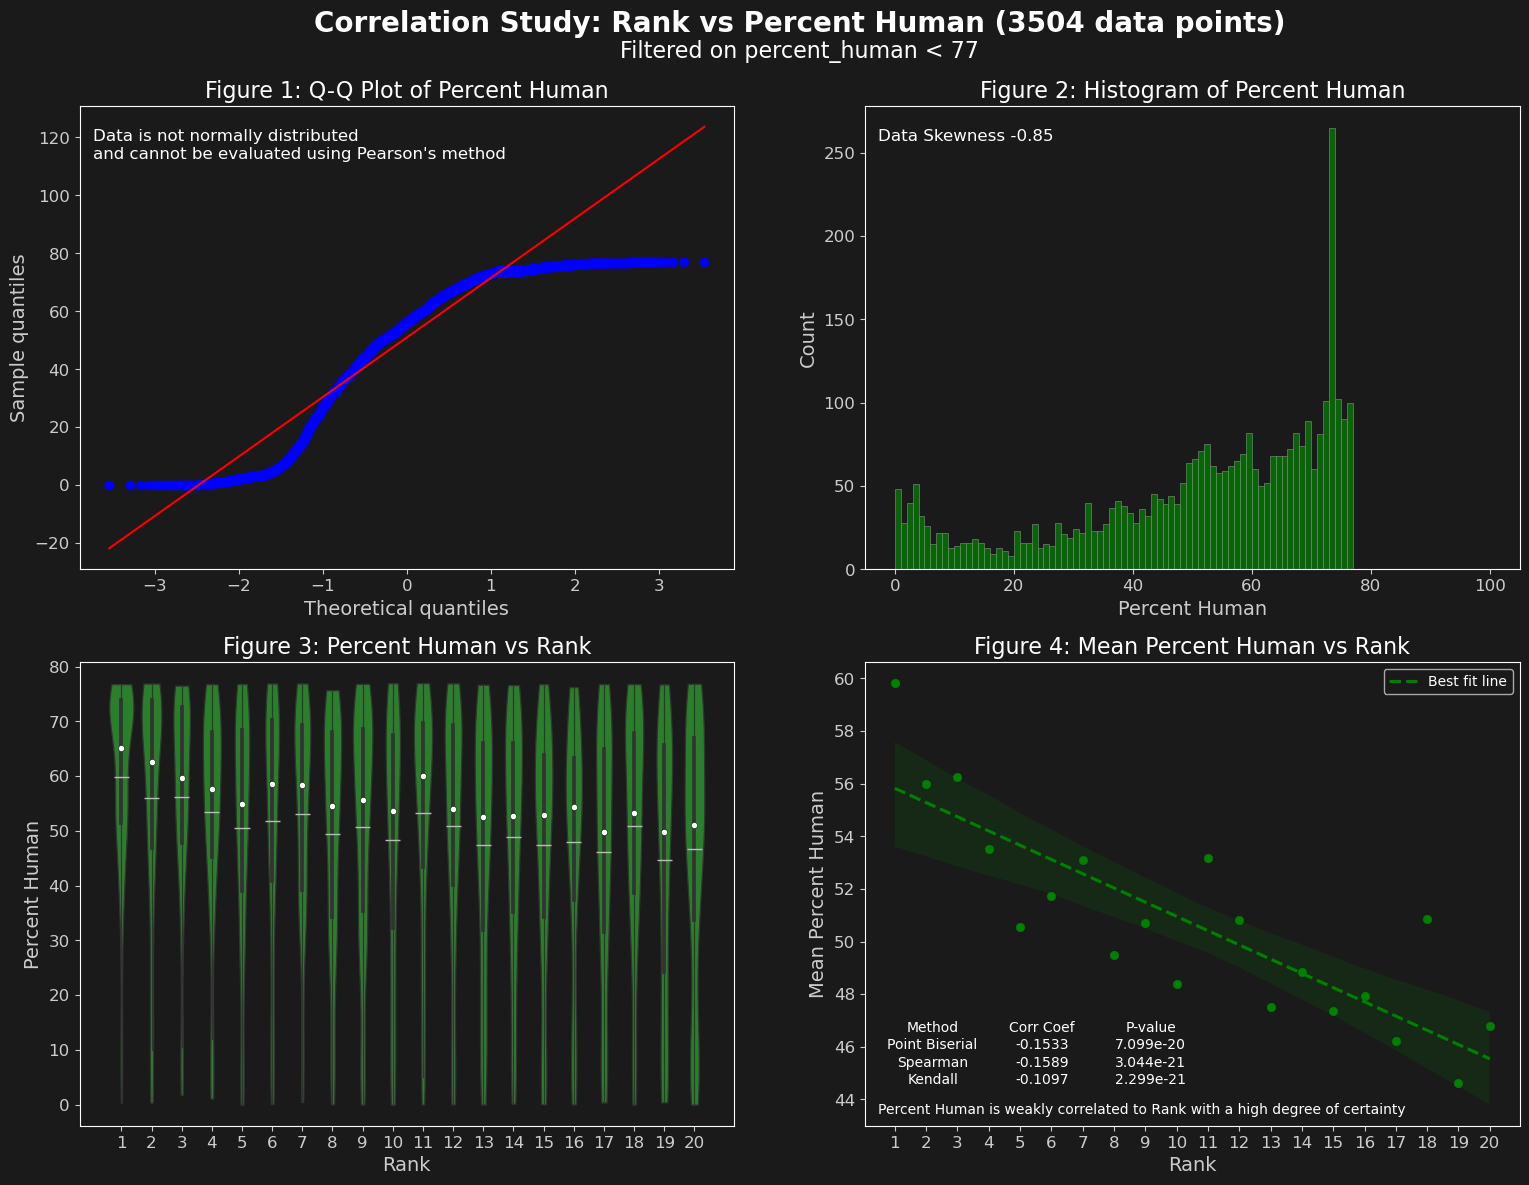

In [109]:
multiplotv_dark(df, 'percent_human', fmax=77)

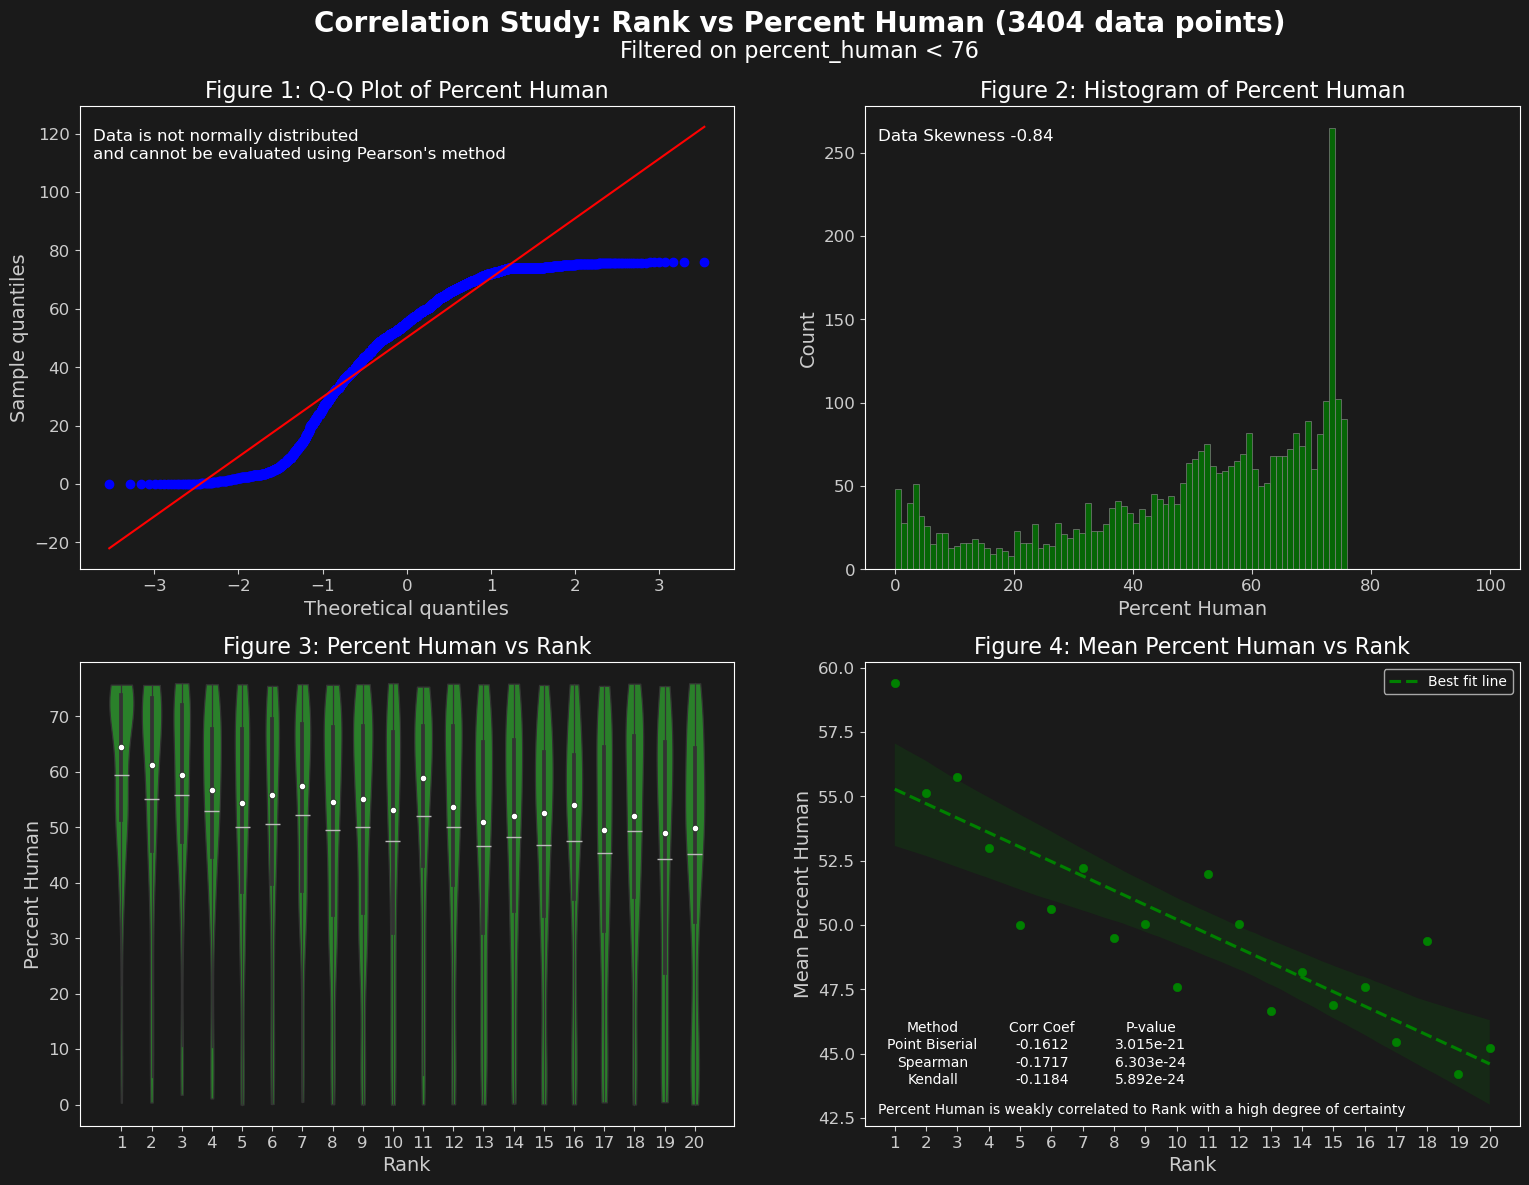

In [110]:
multiplotv_dark(df, 'percent_human', fmax=76)

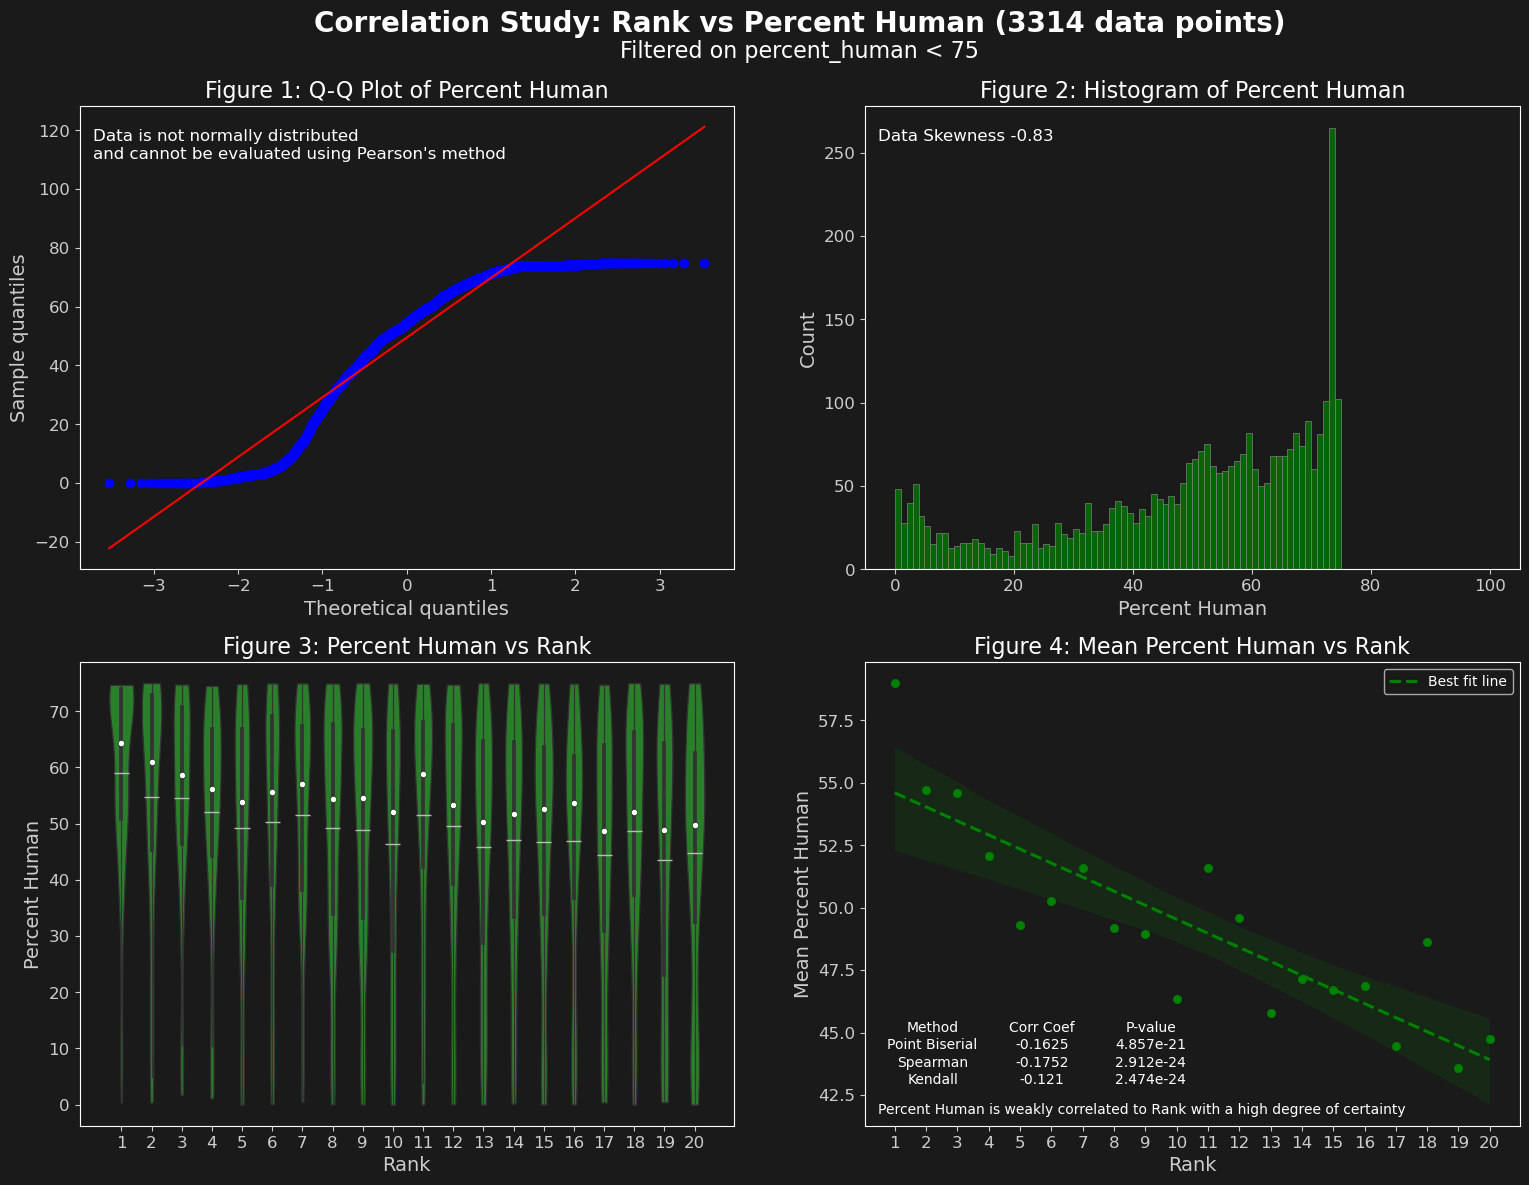

In [111]:
multiplotv_dark(df, 'percent_human', fmax=75)

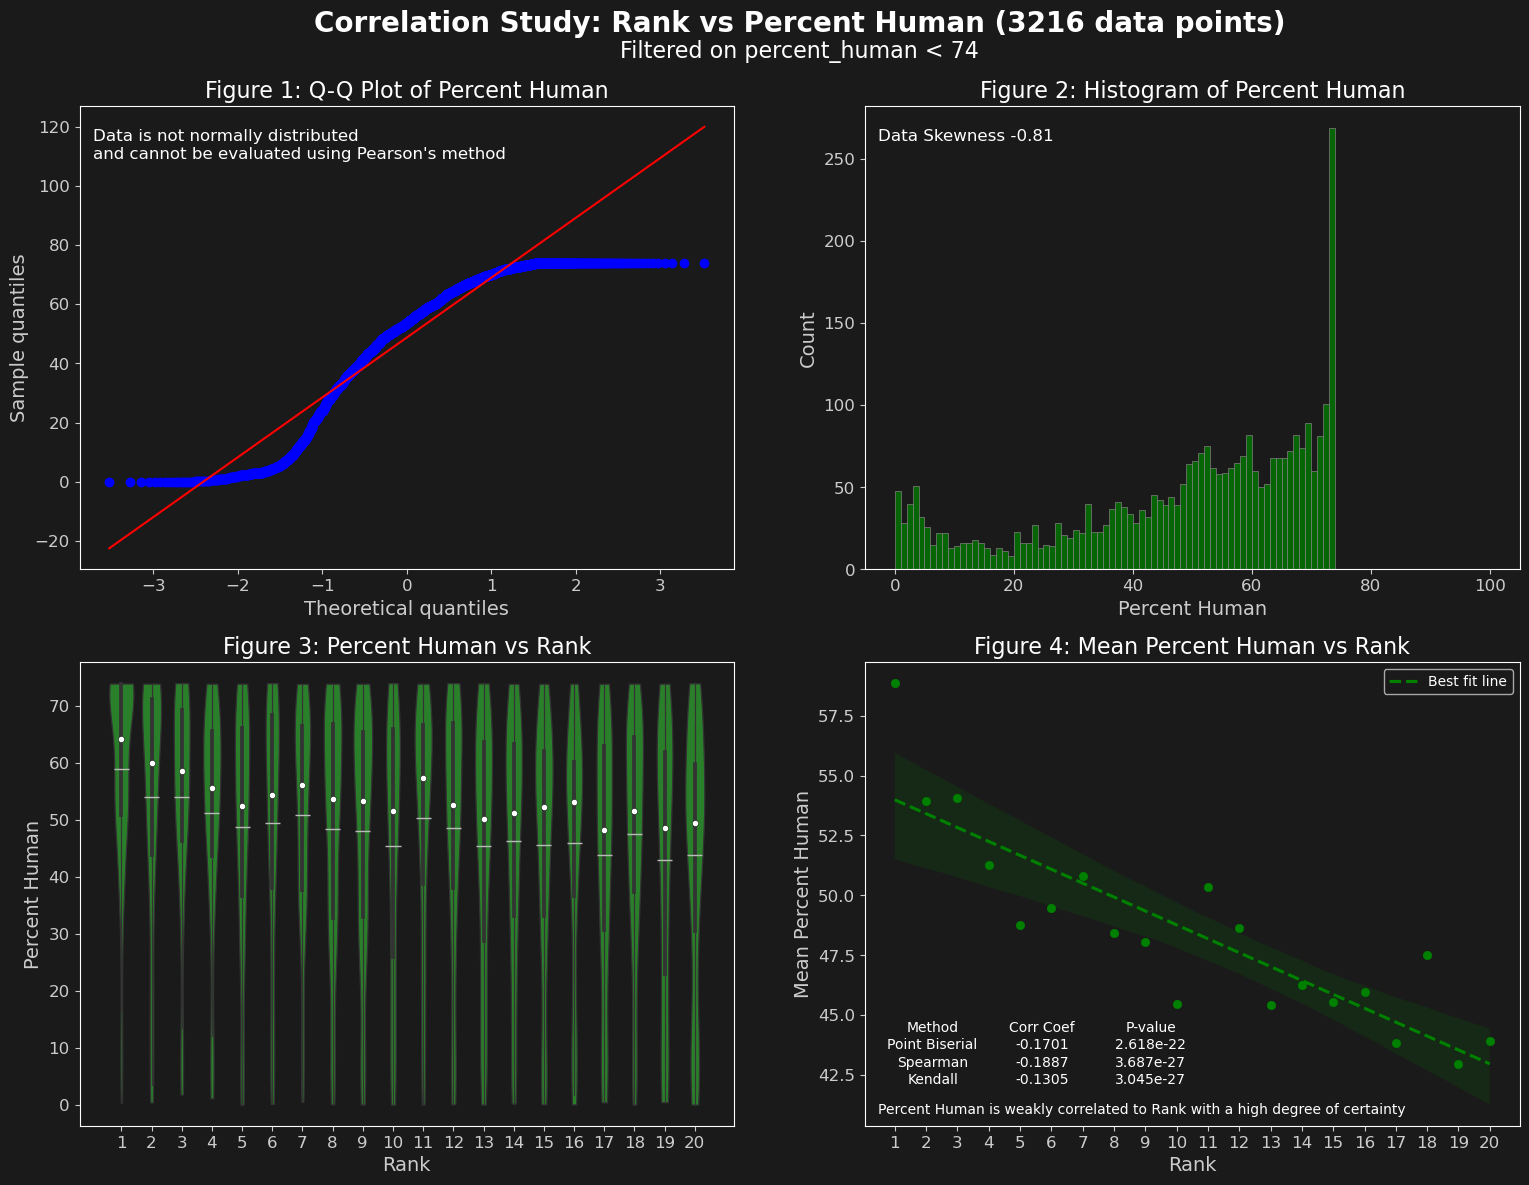

In [112]:
multiplotv_dark(df, 'percent_human', fmax=74)

In [113]:
# try cube roots

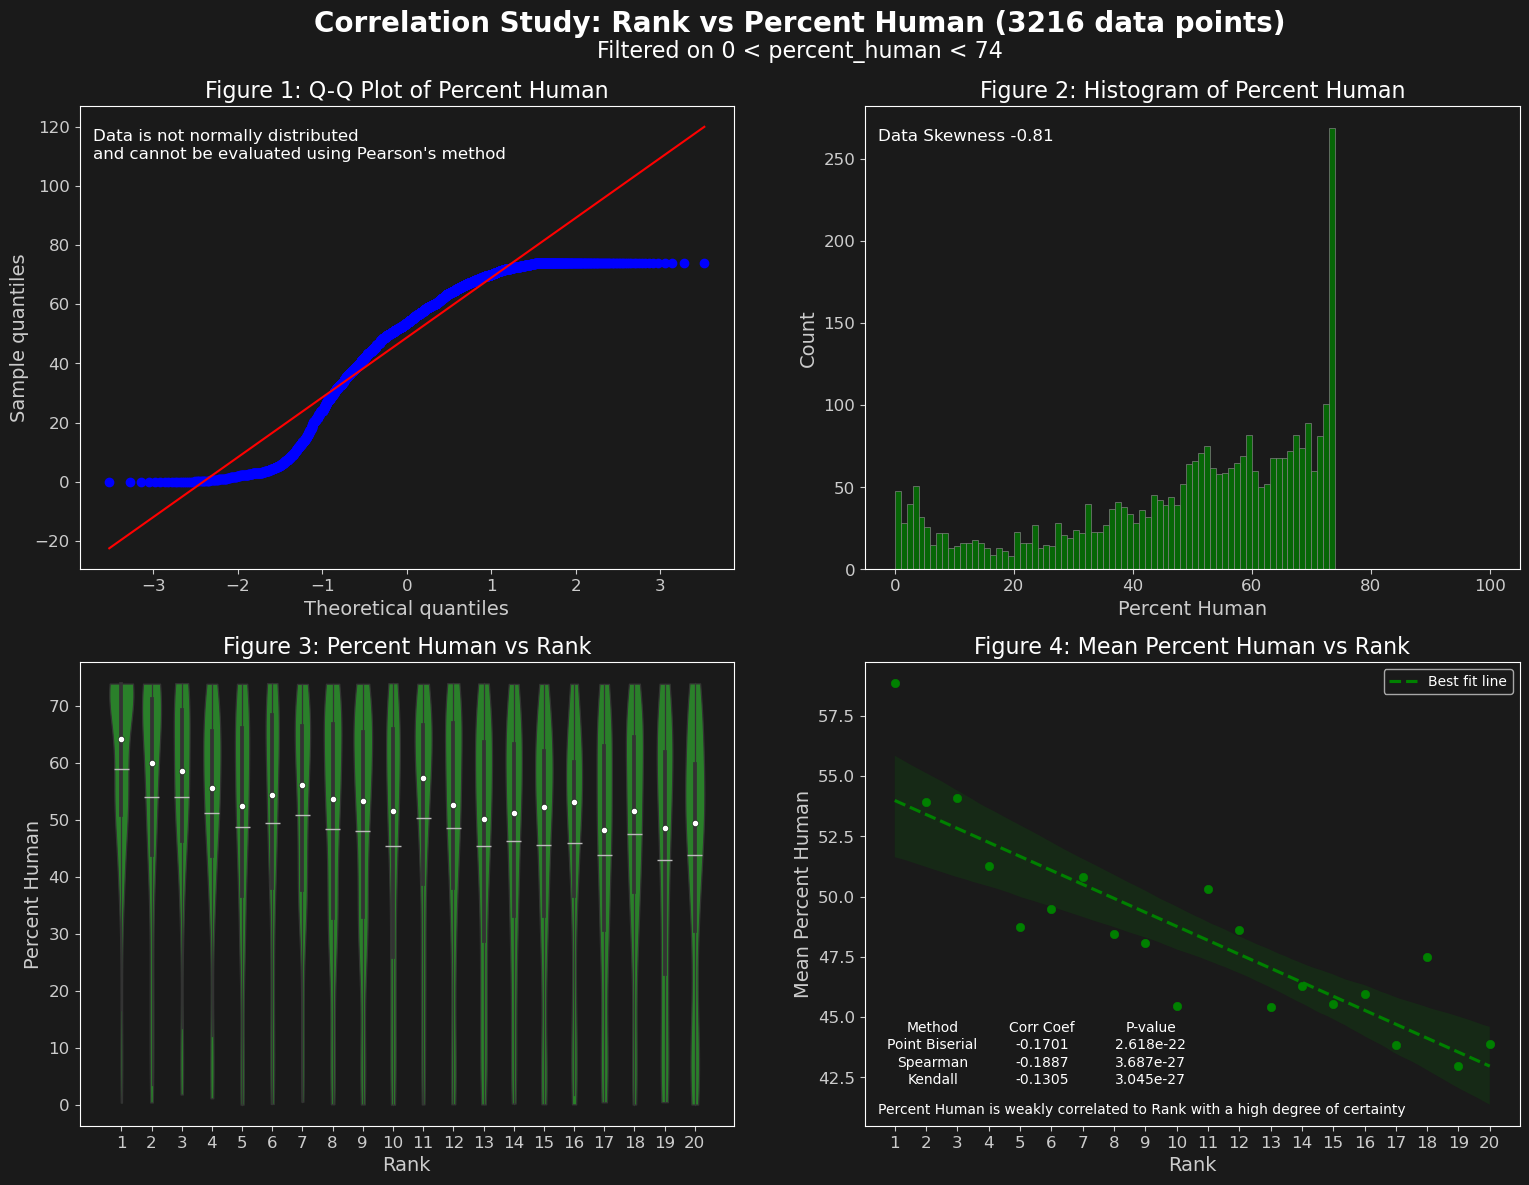

In [114]:
multiplotv_dark(df, 'percent_human', 0, fmax=74)

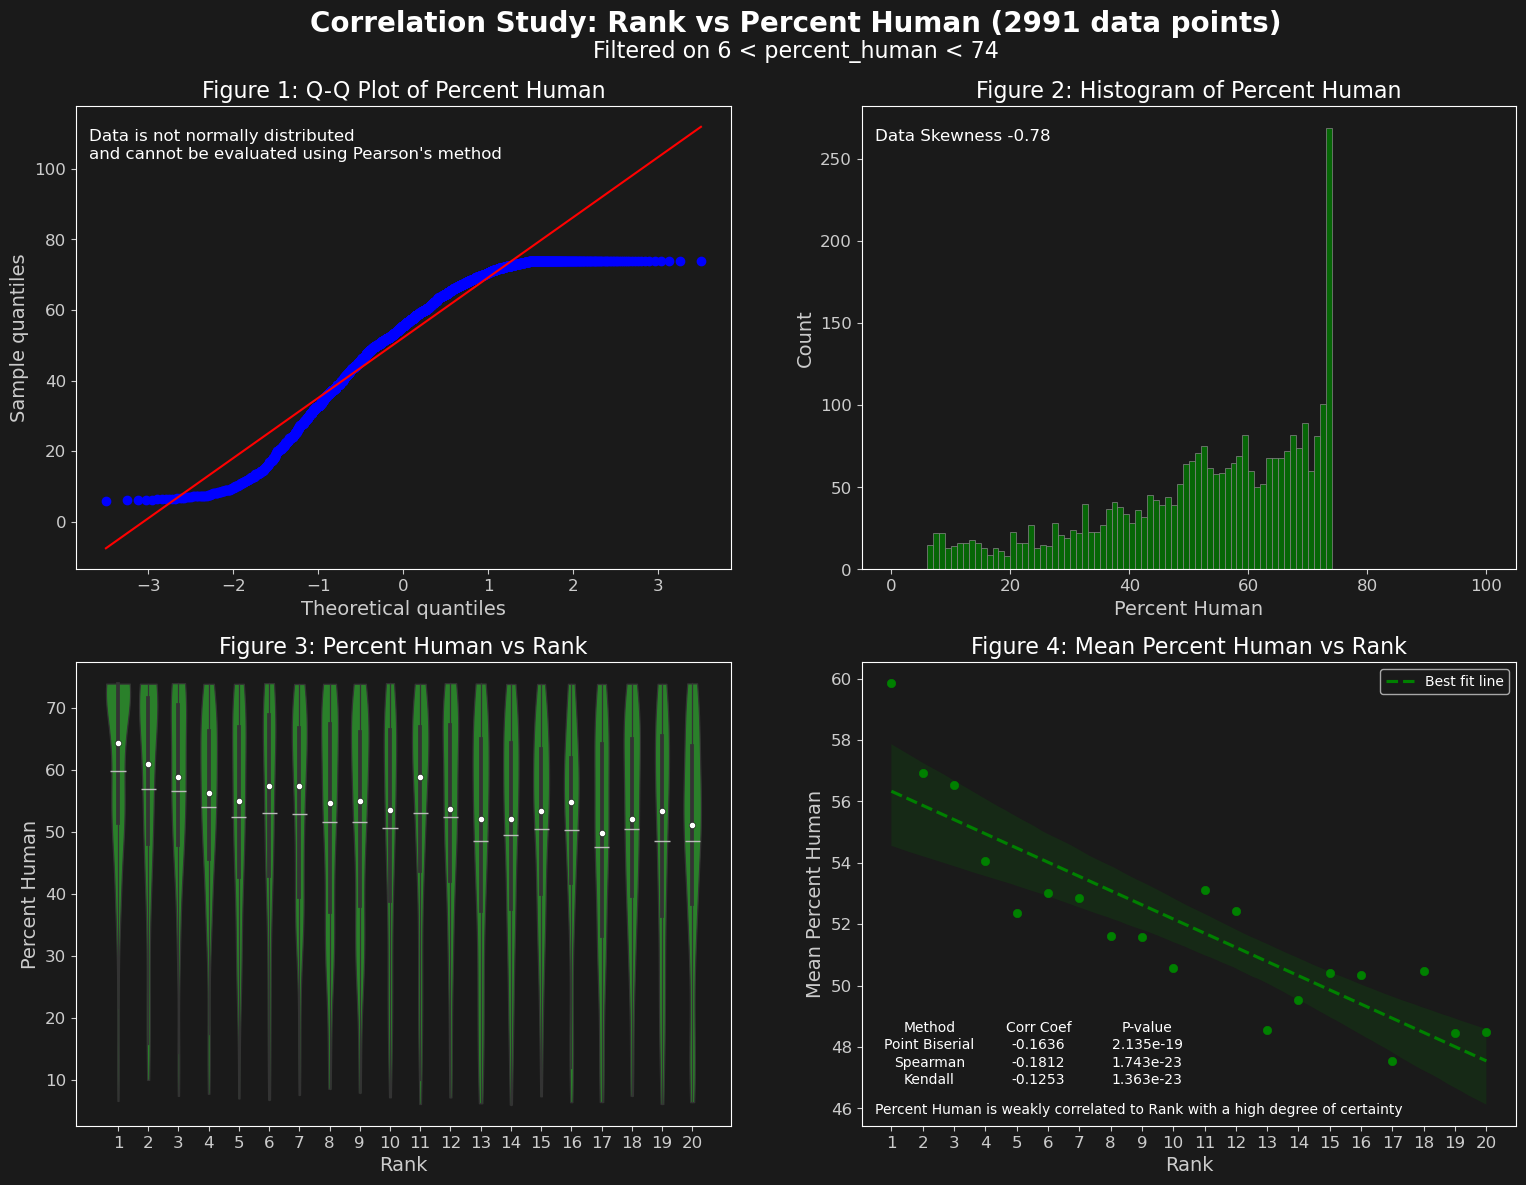

In [115]:
multiplotv_dark(df, 'percent_human', 6, fmax=74)

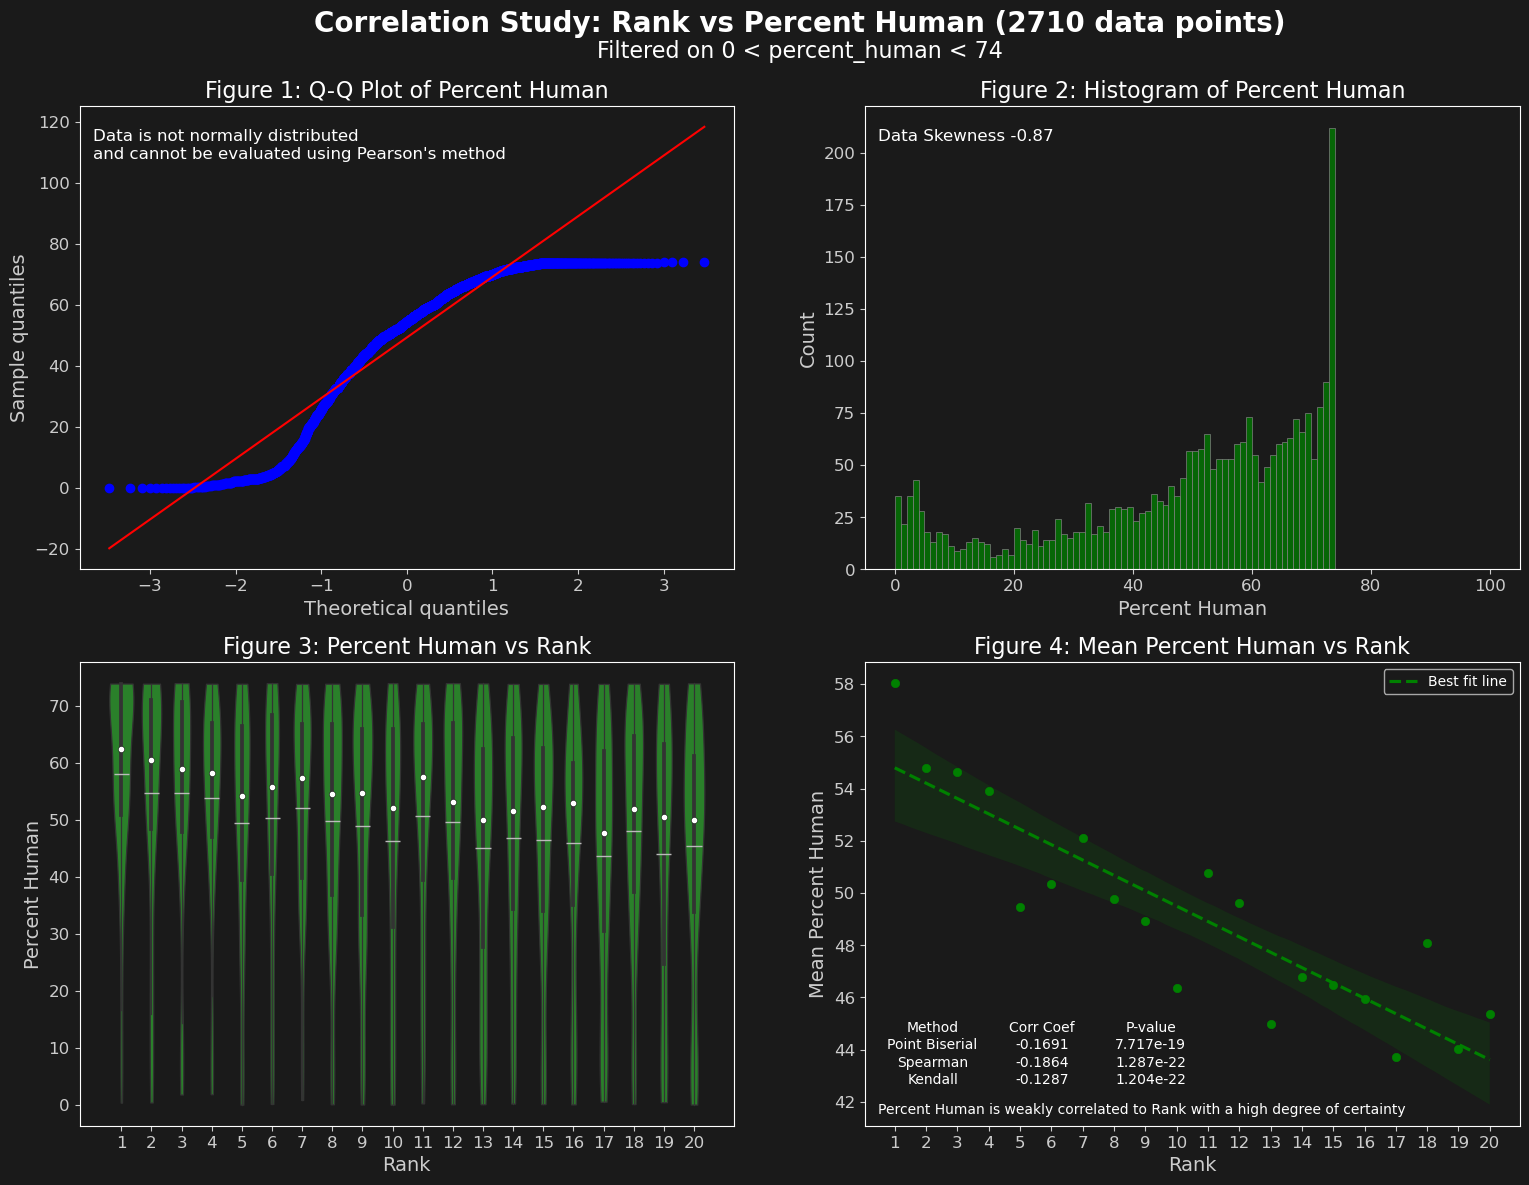

In [122]:
#df1 = df[df['People also ask']==1]
multiplotv_dark(df[df['People also ask']==1], 'percent_human', 0, fmax=74)

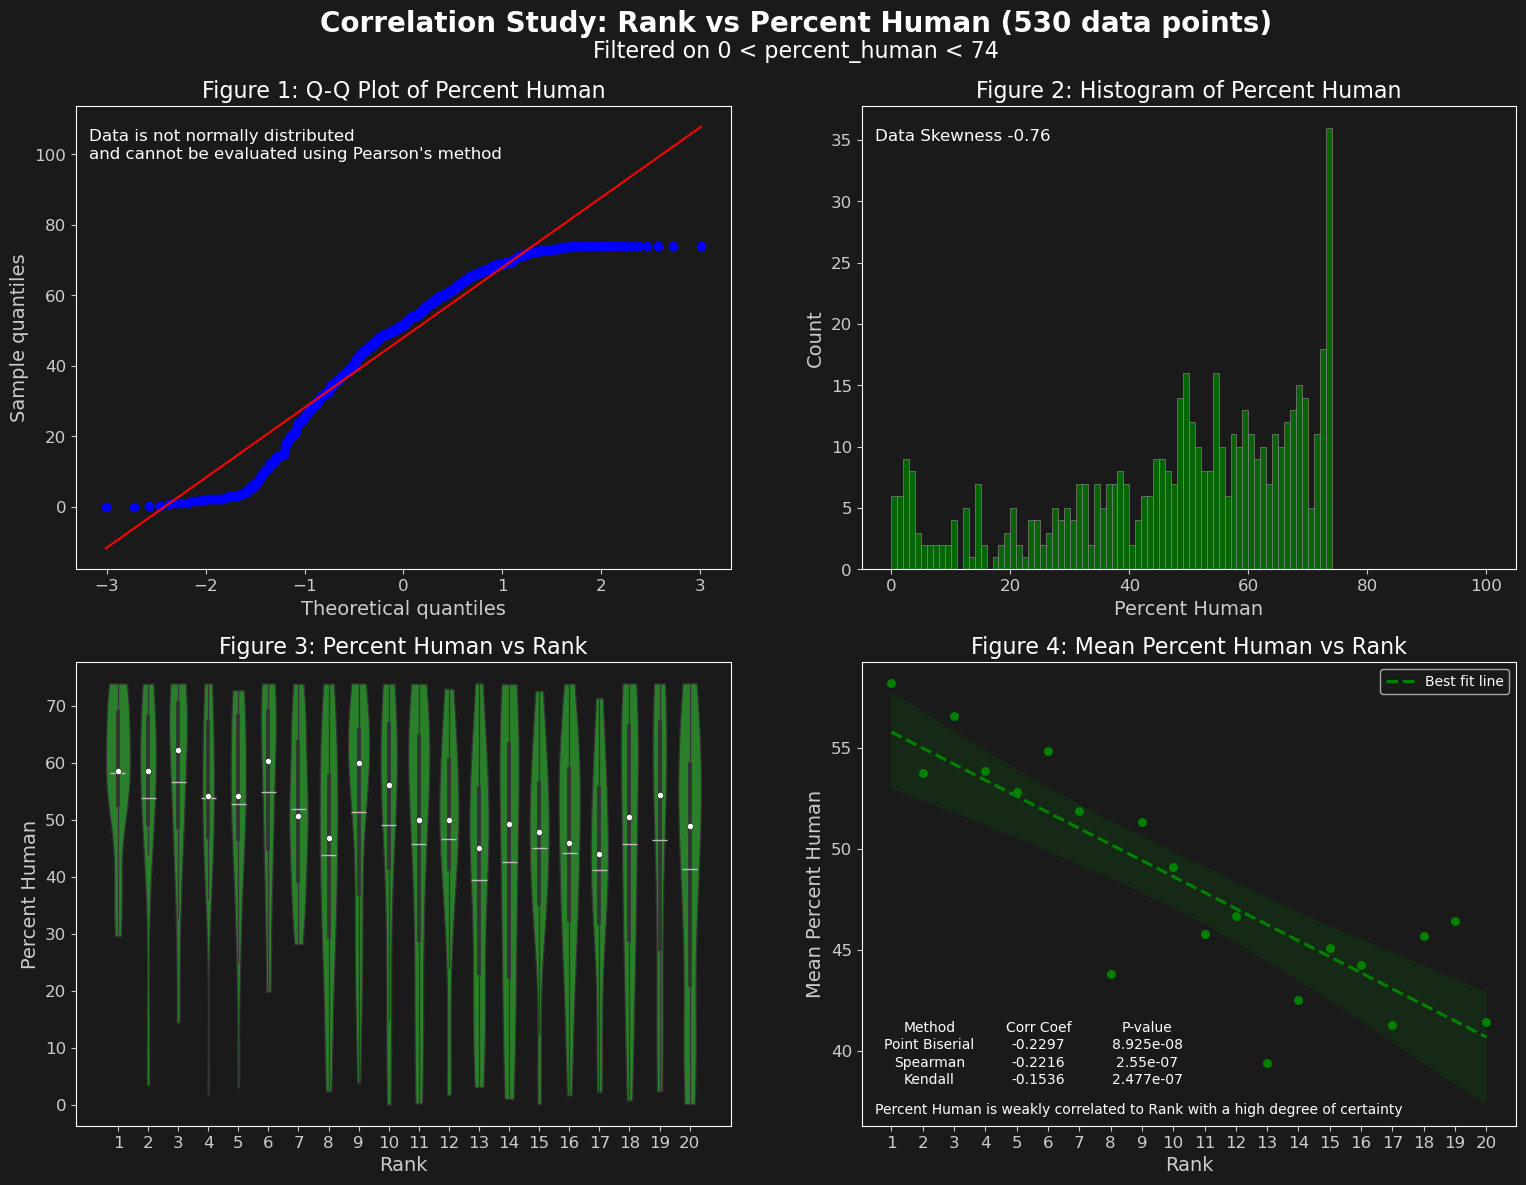

In [123]:
multiplotv_dark(df[df['Knowledge panel']==1], 'percent_human', 0, fmax=74)

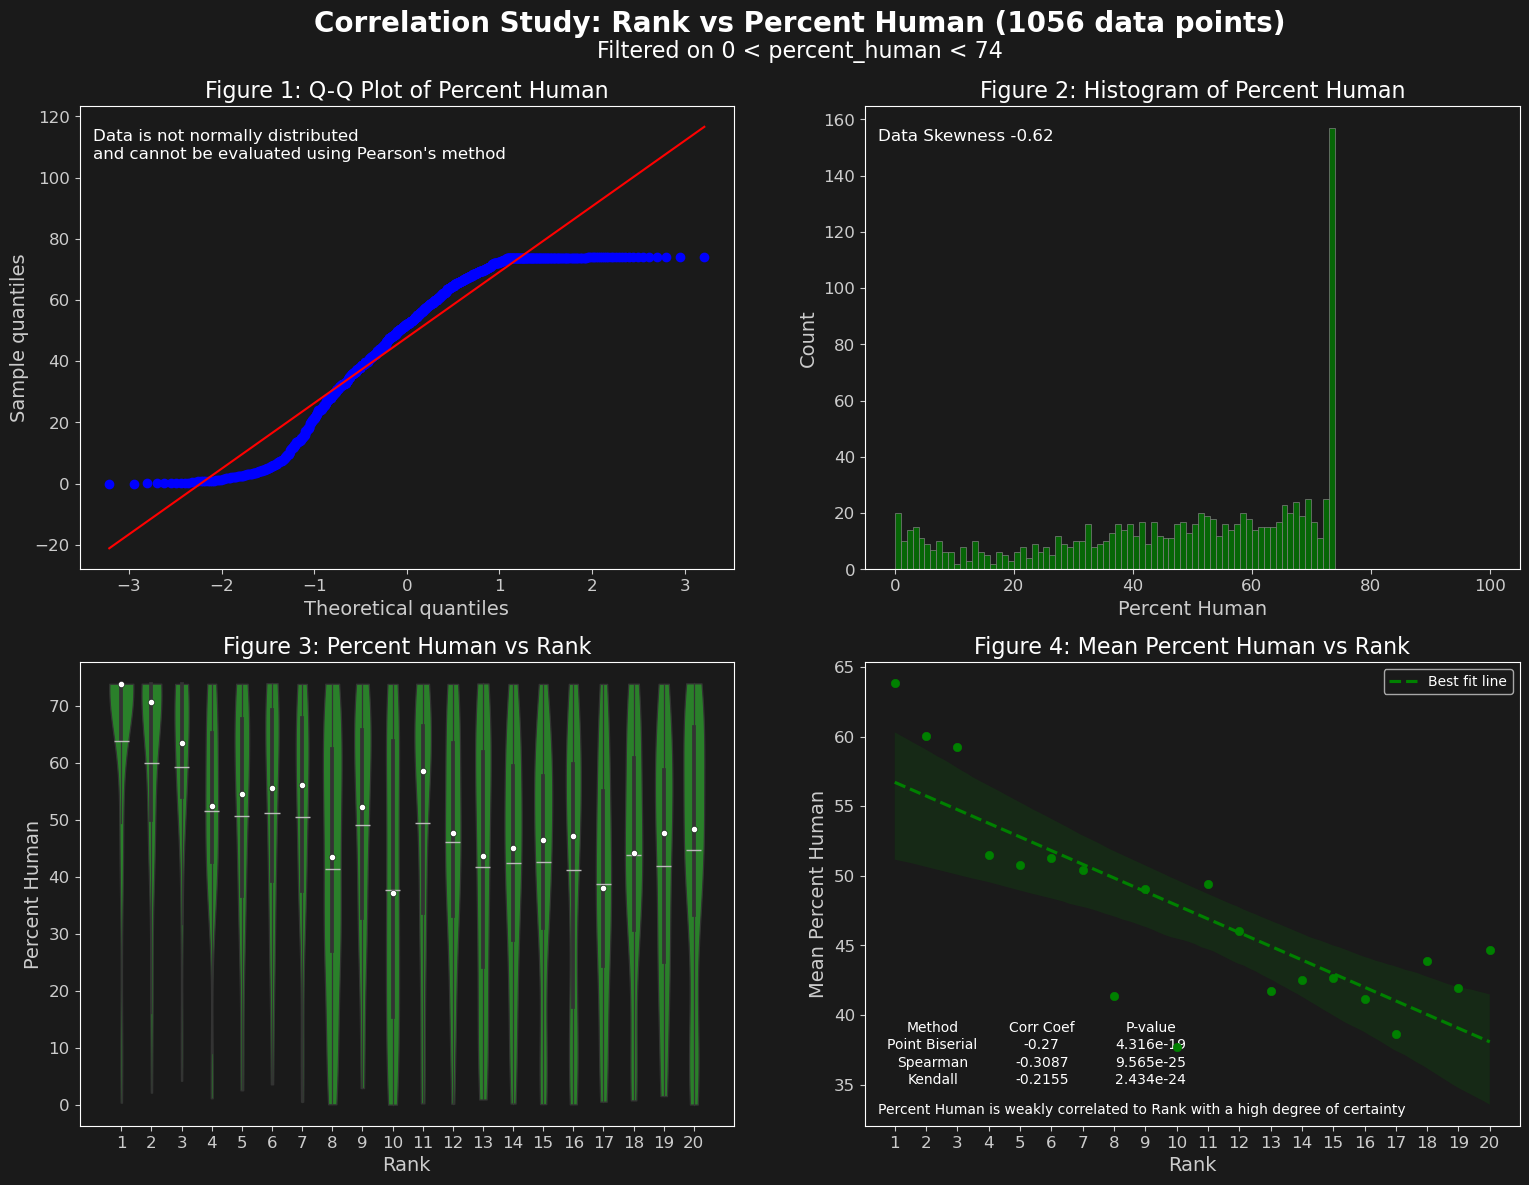

In [201]:
multiplotv_dark(df[df['Shopping results']==1], 'percent_human', 0, fmax=74)

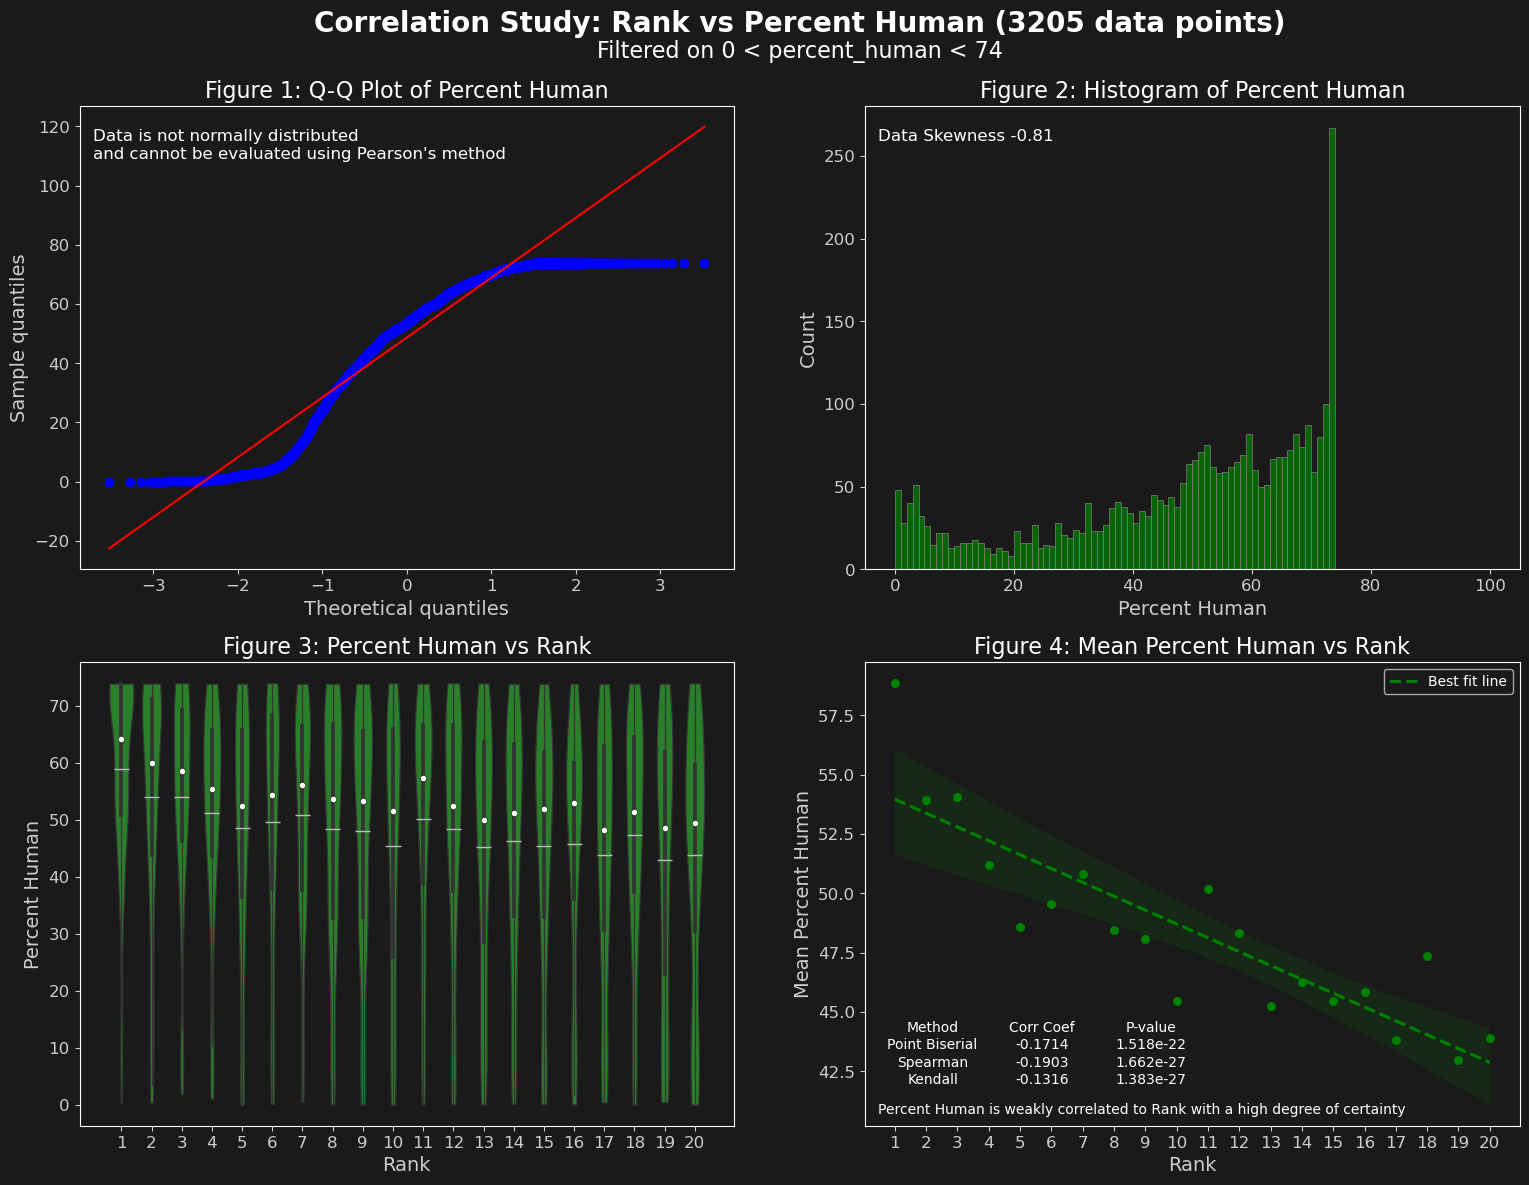

In [171]:
multiplotv_dark(df[(df['Knowledge card']==0) & (df['Tweet box']==0)] , 'percent_human', 0, fmax=74)

In [160]:
def calc_corr(df, columns):
    """
    Calculates the point biserial, spearman, and Kendall correlation coefficients between 
    df['percent_human'] and df['rank'] for each of the one-hot encoded columns in the df.
    
    Args:
        df (pandas DataFrame): The input DataFrame.
        columns (list): A list of column names for which to calculate the correlations.
    
    Returns:
        dict: A dictionary containing the correlation coefficients for each column.
    """
    correlations = {}
    for col in columns:
        df_col = df[df[col] == 1][['rank', 'percent_human']].dropna()
        pb_corr, pb_pvalue = st.pointbiserialr(df_col['rank'], df_col['percent_human'])
        sp_corr, sp_pvalue = st.spearmanr(df_col['rank'], df_col['percent_human'])
        kendall_corr, kendall_pvalue = st.kendalltau(df_col['rank'], df_col['percent_human'])
        correlations[col] = {'Point Biserial Correlation': pb_corr, 'Spearman Correlation': sp_corr, 'Kendall Tau Correlation': kendall_corr}
        #correlations[col] = {'Point Biserial': {'Correlation': pb_corr, 'p-value': pb_pvalue}, 'Spearman': {'Correlation': sp_corr, 'p-value': sp_pvalue,}, 'Kendall Tau': {'Correlation': kendall_corr, 'p-value': kendall_pvalue}}
    return correlations

In [163]:
columns = ['People also ask', 'Sitelinks', 'Thumbnail', 'Shopping results', 'Featured snippet', 'Image pack', 'Video preview', 'Knowledge panel', 'Videos', 'Top stories', 'Local pack', 'Adwords top', 'Adwords bottom', 'Adwords sitelink', 'Local teaser', 'Knowledge card', 'Tweet box']
corr_dict = calc_corr(df[df['percent_human']<= 74], columns)
corr_df = pd.DataFrame.from_dict(corr_dict)
corr_df

People also ask  Sitelinks  Thumbnail  \
Point Biserial Correlation        -0.169124  -0.182438  -0.240747   
Spearman Correlation              -0.186428  -0.196001  -0.275562   
Kendall Tau Correlation           -0.128726  -0.135514  -0.192338   

                            Shopping results  Featured snippet  Image pack  \
Point Biserial Correlation         -0.269960         -0.061628   -0.178095   
Spearman Correlation               -0.308671         -0.082894   -0.187304   
Kendall Tau Correlation            -0.215524         -0.055927   -0.129816   

                            Video preview  Knowledge panel    Videos  \
Point Biserial Correlation      -0.215290        -0.229703 -0.102409   
Spearman Correlation            -0.244935        -0.221609 -0.094961   
Kendall Tau Correlation         -0.169447        -0.153608 -0.066044   

                            Top stories  Local pack  Adwords top  \
Point Biserial Correlation    -0.108053    0.134617    -0.009713   
Spearman Correlation          -0.147912    0.077663    -0.037978   
Kendall Tau Correlation       -0.099306    0.056286    -0.040991   

                            Adwords bottom  Adwords sitelink  Local teaser  \
Point Biserial Correlation       -0.215678          0.011607     -0.266893   
Spearman Correlation             -0.310779         -0.009407     -0.248316   
Kendall Tau Correlation          -0.236788         -0.020926     -0.221496   

                            Knowledge card  Tweet box  
Point Biserial Correlation        0.457072   0.457867  
Spearman Correlation              0.542857   0.600000  
Kendall Tau Correlation           0.466667   0.400000

In [193]:
block_col = ['Featured snippet', 'Videos', 'Top stories', 'Adwords top', 'Adwords sitelink', 'Knowledge card', 'Tweet box']
mask = (df[block_col] == 0).all(axis=1)
filtered_df = df[mask]

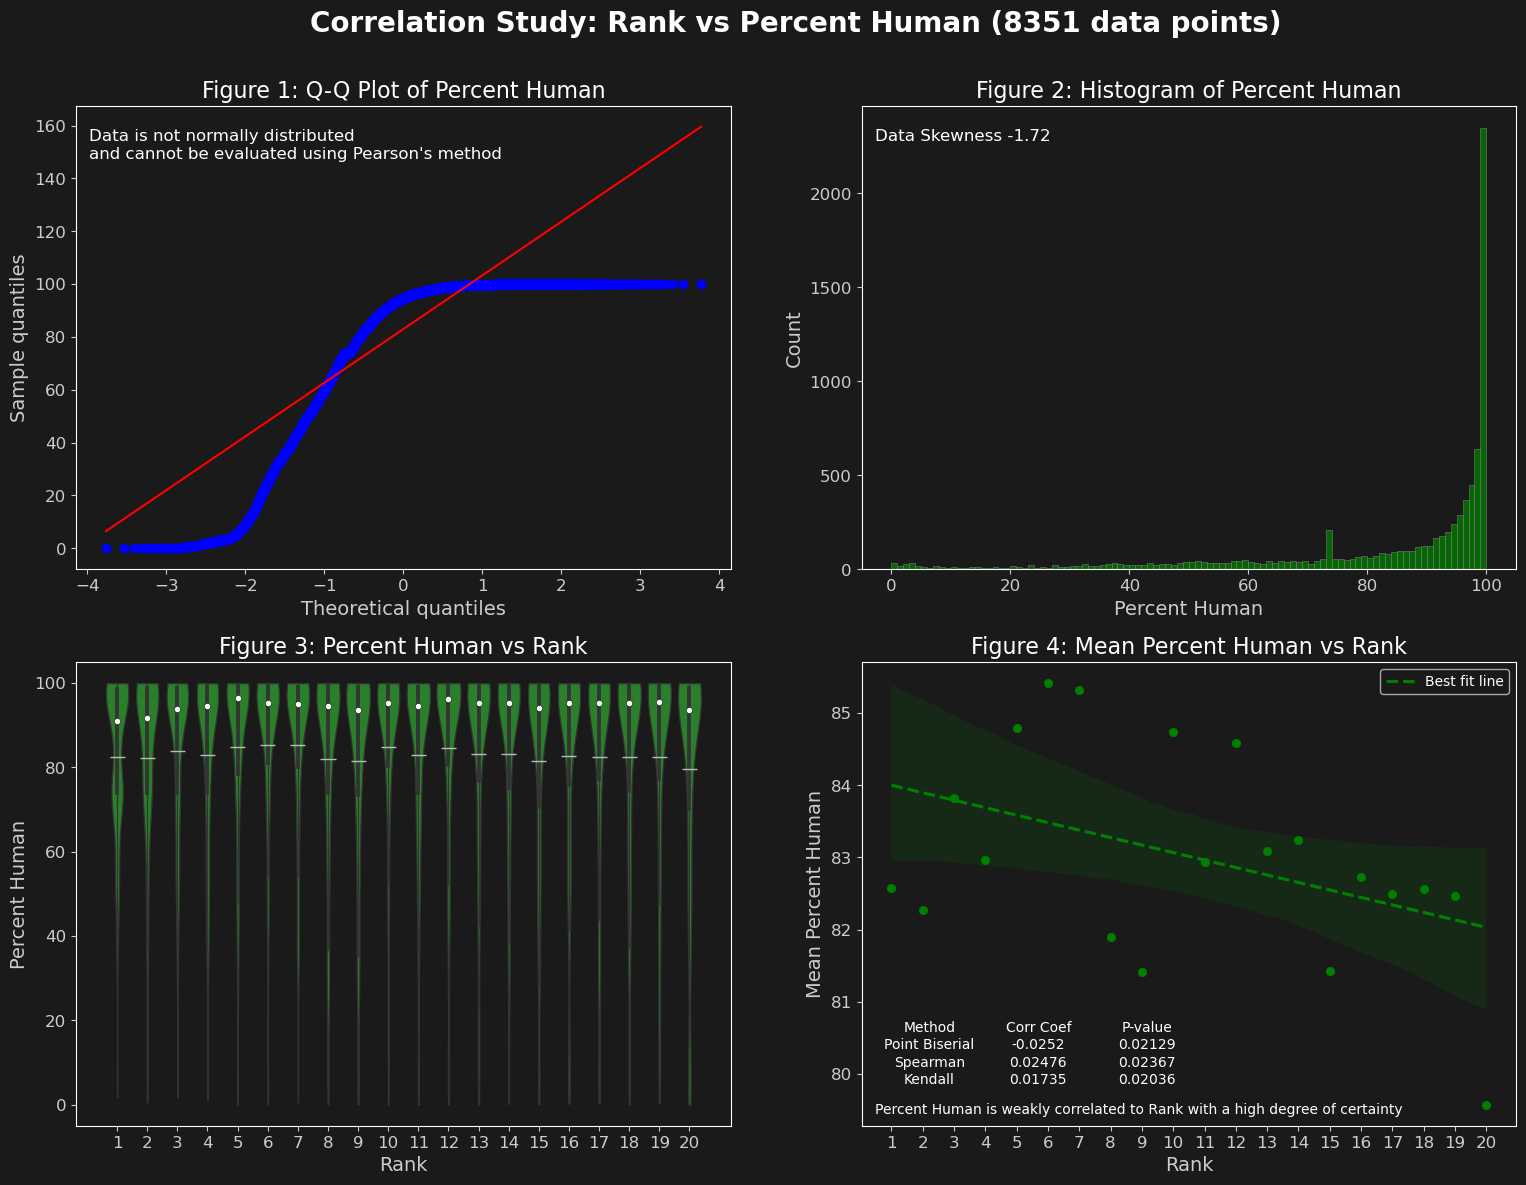

In [194]:
multiplotv_dark(filtered_df)

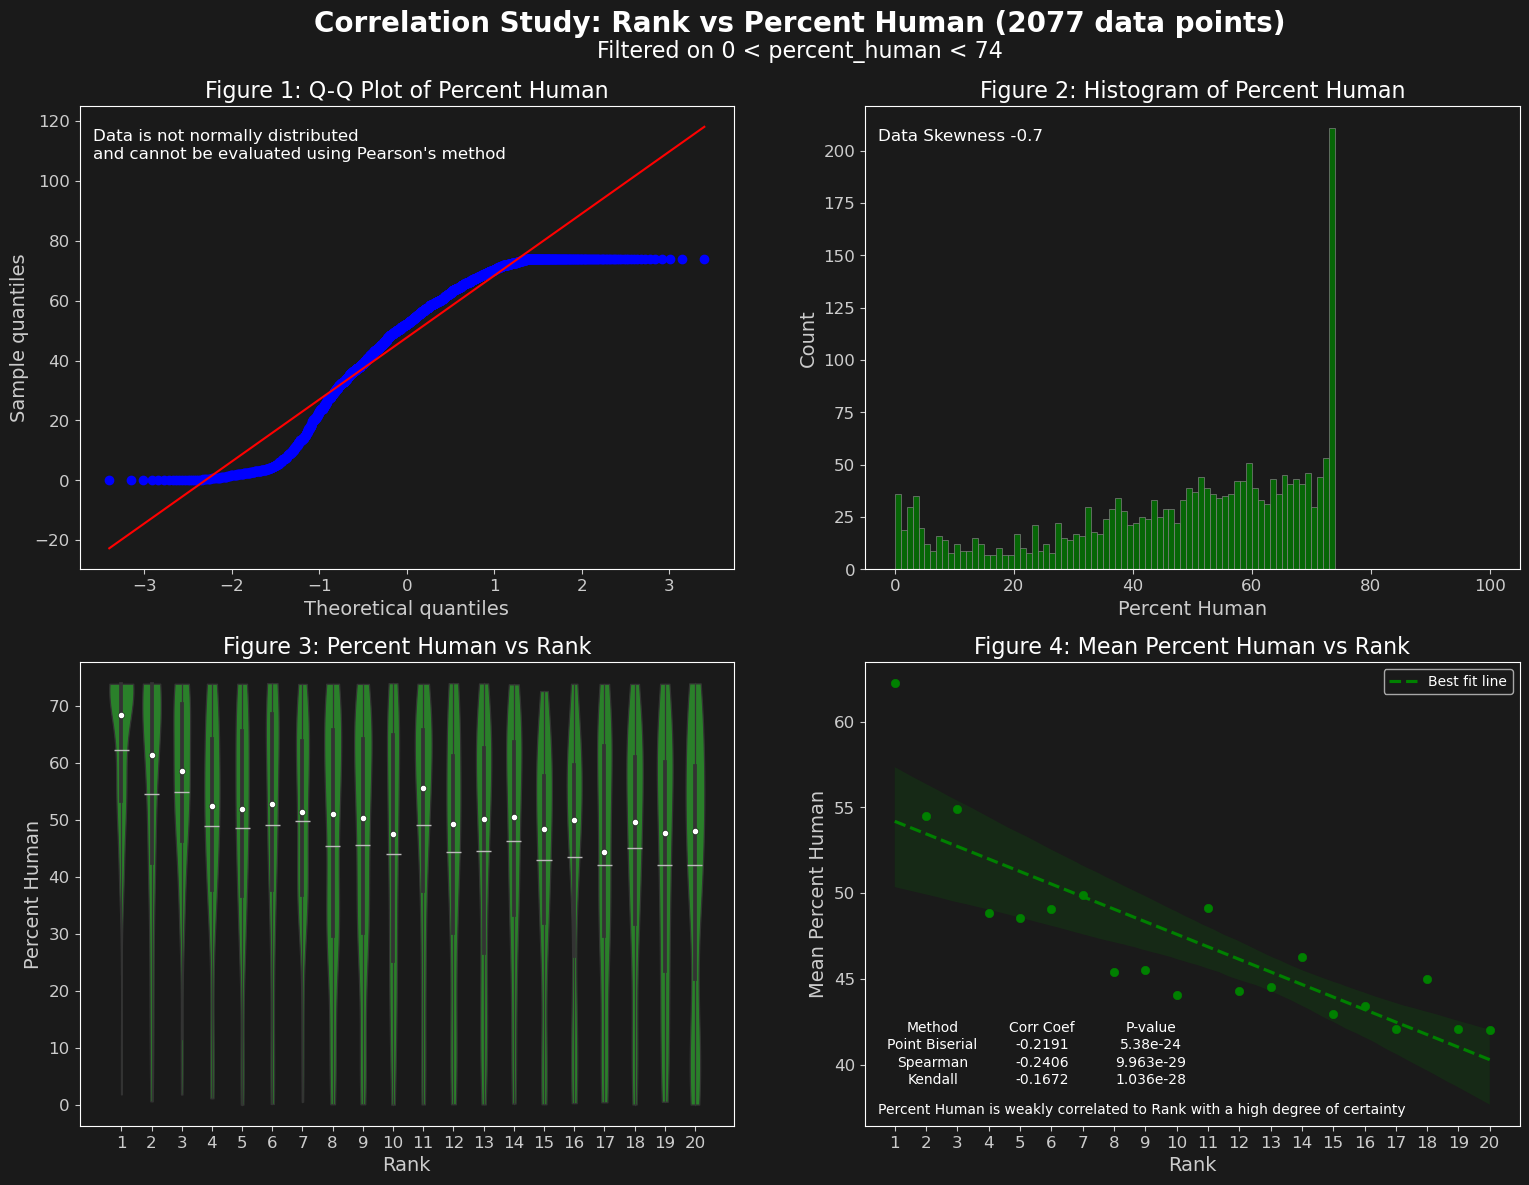

In [195]:
multiplotv_dark(filtered_df, 'percent_human', fmin=0, fmax=74)

In [ ]:
block_col = ['Featured snippet', 'Videos', 'Top stories', 'Adwords top', 'Adwords sitelink', 'Knowledge card', 'Tweet box']
mask = (df[block_col] == 0).all(axis=1)
filtered_df = df[mask]